To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

### 1.Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

### 2. First, load the dataset.

### 3. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

### 4. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

### 5. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

### 6. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

### Libraries used:

In [11]:
import pandas as pd #for dataframe
import numpy as np #linear algebra libraries
import matplotlib.pyplot as plt #visualization
import seaborn as sns # seaborn for visualization
import math #statistics
from sklearn.preprocessing import StandardScaler # for standardization and normalization
from sklearn.decomposition import PCA #to reduce Linear dimensionality
from sklearn.preprocessing import normalize #for normalization
from sklearn.preprocessing import scale #for standardization
from sqlalchemy import create_engine # for open connection of SQL and python
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### Accessing Thinkful Database:

In [12]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_expectancy = pd.read_sql_query('select * from lifeexpectancy',con=engine) #pandas query string

engine.dispose() #close the connection

In [13]:
#lets make a copy
life_expectancy_c=life_expectancy.copy()

#### EDA: Data Cleaning:

In [14]:
life_expectancy_c

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


After quick checking the data, we do see missing values

In [15]:
#life_expectancy_c[life_expectancy_c['Status']=='Developed']

In [16]:
#Lets, see some information of data
life_expectancy_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

There is 2938 rows and 22 columns. Dtypes looks okay as Country and Status is object, and others are floats and integers. Life expectancy, Adult Mortality, Alcohol, Hepatitis, BMT, Polio, Total expenditure, Diptheria, GDP, Population, thinness 1-19 and thinness 5-9, Income composition, and schooling are missing some values.

In [17]:
##to generate descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.
life_expectancy_c.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [18]:
#Checking for column data if needed cleanning
life_expectancy_c.columns.unique()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

We can see some of the columns have white space in the beggining and end of the string, so I will fix it.

In [19]:
life_expectancy_c.columns = life_expectancy_c.columns.str.strip() #deleting white space on both side of string

In [20]:
life_expectancy_c.columns.unique()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

We can see all the columns title has no white space, but still we can see thinness 1-19 years doeas have some space in between.

Lets clean that white space.

In [21]:
#life_expectancy_c.columns = life_expectancy_c.columns.replace("  ", " ") #to remove whitespace

In [22]:
#'thinness  1-19 years'.replace("  ", " ") #to remove whitespace

In [23]:
#life_expectancy_c.columns.unique() #checking for clean data

In [24]:
life_expectancy_c.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


Life expectancy is highly correlated to Schooling(0.75)and Income composition of resources(0.724776), and is negatively correlated to Adult mortality, HIV/AIDS, thinness 1-19 years, thinness 5-9 years, little bit to infant deaths, Measles, under-five deaths, Population.

From the table, under five death is higly correlated to infant death, percentage expenditure is highly correlated to GDP, thinness 1-19 years is highly correlated to thinness 5-9 years,and Schooling and Income composition of resources is highly correlated to each others.

### Missing values:

In [25]:
#Lets, see the sum of missing values in the table for each columns.
life_expectancy_c.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

We can see lots of missing values, high of 652 in population to low of 10 in Life expectancy and Adult mortality.


Also we can check for unique values in columns to see any problematic value in place of missing values.

In [26]:
#lets use function to find all the unique values in columns,
for column in life_expectancy_c.columns:
    print("--Unique values in column {} are:\n {}, \n unique number is : {}".format
          (column, life_expectancy_c[column].unique(), life_expectancy_c[column].nunique()))


--Unique values in column Country are:
 ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Icelan

From above, we can see that, the missing values is only nan,but also be sure that there is no other hidden values I will replace some of non readable missing values to readable missing values.

In [27]:
#life_expectancy_c.groupby(['Country', 'Status'])['GDP'].mean()

In [28]:
#replacing to numpy missing values
life_expectancy_c.replace(to_replace =['n/a', 'na', 'nan','NaN','NA', '--','...', 'inf'], value =np.nan, inplace = True)



In [29]:
life_expectancy_c.isna().sum()#checking for any changes in sum of missing values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

It looks like there is no change in missing values. 

In [30]:
#dropping lower number of missing values in life expectancy and adult mortality.

life_expectancy_c.dropna(subset=['Life expectancy'], inplace=True)
life_expectancy_c.dropna(subset=['Adult Mortality'], inplace=True)


In [31]:
#filling all missing values witj their mean grouping by country
life_expectancy_cg=life_expectancy_c.groupby('Country').apply(lambda x: x.fillna
                                                          (life_expectancy_c.mean()))


In [32]:
#checking for remaining missing values
life_expectancy_cg.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

so now there is no more missing values.

In [33]:
life_expectancy_cg.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.036464,-0.044669,0.032723,0.090739,-0.081840,0.104094,-0.041980,0.094158,0.078679,0.134333,-0.138789,0.094443,0.015180,-0.044835,-0.047888,0.236222,0.207357
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.392420,0.381864,0.204566,-0.157586,0.562453,-0.222529,0.462592,0.209628,0.476442,-0.556556,0.430551,-0.019629,-0.472778,-0.467231,0.692621,0.718614
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.190791,-0.242860,-0.139146,0.031176,-0.383641,0.094146,-0.273295,-0.111772,-0.273602,0.523821,-0.277081,-0.012509,0.300262,0.305767,-0.440154,-0.437255
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.114806,-0.085906,-0.179724,0.501038,-0.227427,0.996628,-0.171049,-0.126769,-0.175524,0.024955,-0.107327,0.548547,0.465590,0.471229,-0.143554,-0.193232
Alcohol,-0.044669,0.392420,-0.190791,-0.114806,1.000000,0.339454,0.074245,-0.051786,0.325939,-0.111781,0.214038,0.300901,0.215578,-0.049719,0.318622,-0.030934,-0.420607,-0.409477,0.417014,0.498167
percentage expenditure,0.032723,0.381864,-0.242860,-0.085906,0.339454,1.000000,0.011988,-0.056831,0.230976,-0.088152,0.147608,0.175222,0.143967,-0.098230,0.888213,-0.024704,-0.252228,-0.253761,0.380713,0.389898
Hepatitis B,0.090739,0.204566,-0.139146,-0.179724,0.074245,0.011988,1.000000,-0.090827,0.139102,-0.185377,0.406308,0.060839,0.498359,-0.103061,0.062259,-0.110472,-0.106911,-0.110112,0.151143,0.165083
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.051786,-0.056831,-0.090827,1.000000,-0.176019,0.507718,-0.136440,-0.104730,-0.142154,0.030673,-0.068222,0.236236,0.224516,0.220774,-0.115678,-0.123611
BMI,0.104094,0.562453,-0.383641,-0.227427,0.325939,0.230976,0.139102,-0.176019,1.000000,-0.237833,0.285168,0.228134,0.283995,-0.243575,0.279664,-0.063235,-0.530805,-0.537784,0.482317,0.519223
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.111781,-0.088152,-0.185377,0.507718,-0.237833,1.000000,-0.189120,-0.128472,-0.196065,0.037783,-0.110864,0.535889,0.467620,0.472091,-0.161428,-0.208674


After dropping and fixing missing values, a little only change on correlation between life expectancy and others. Well, schooling became highly correlated to lifeexpectancy now and then income composition of resources.

In [34]:
#Statistical decription after fixing missing values
life_expectancy_cg.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.390628e+07,4.396597,4.484890,0.205131,3.253691
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


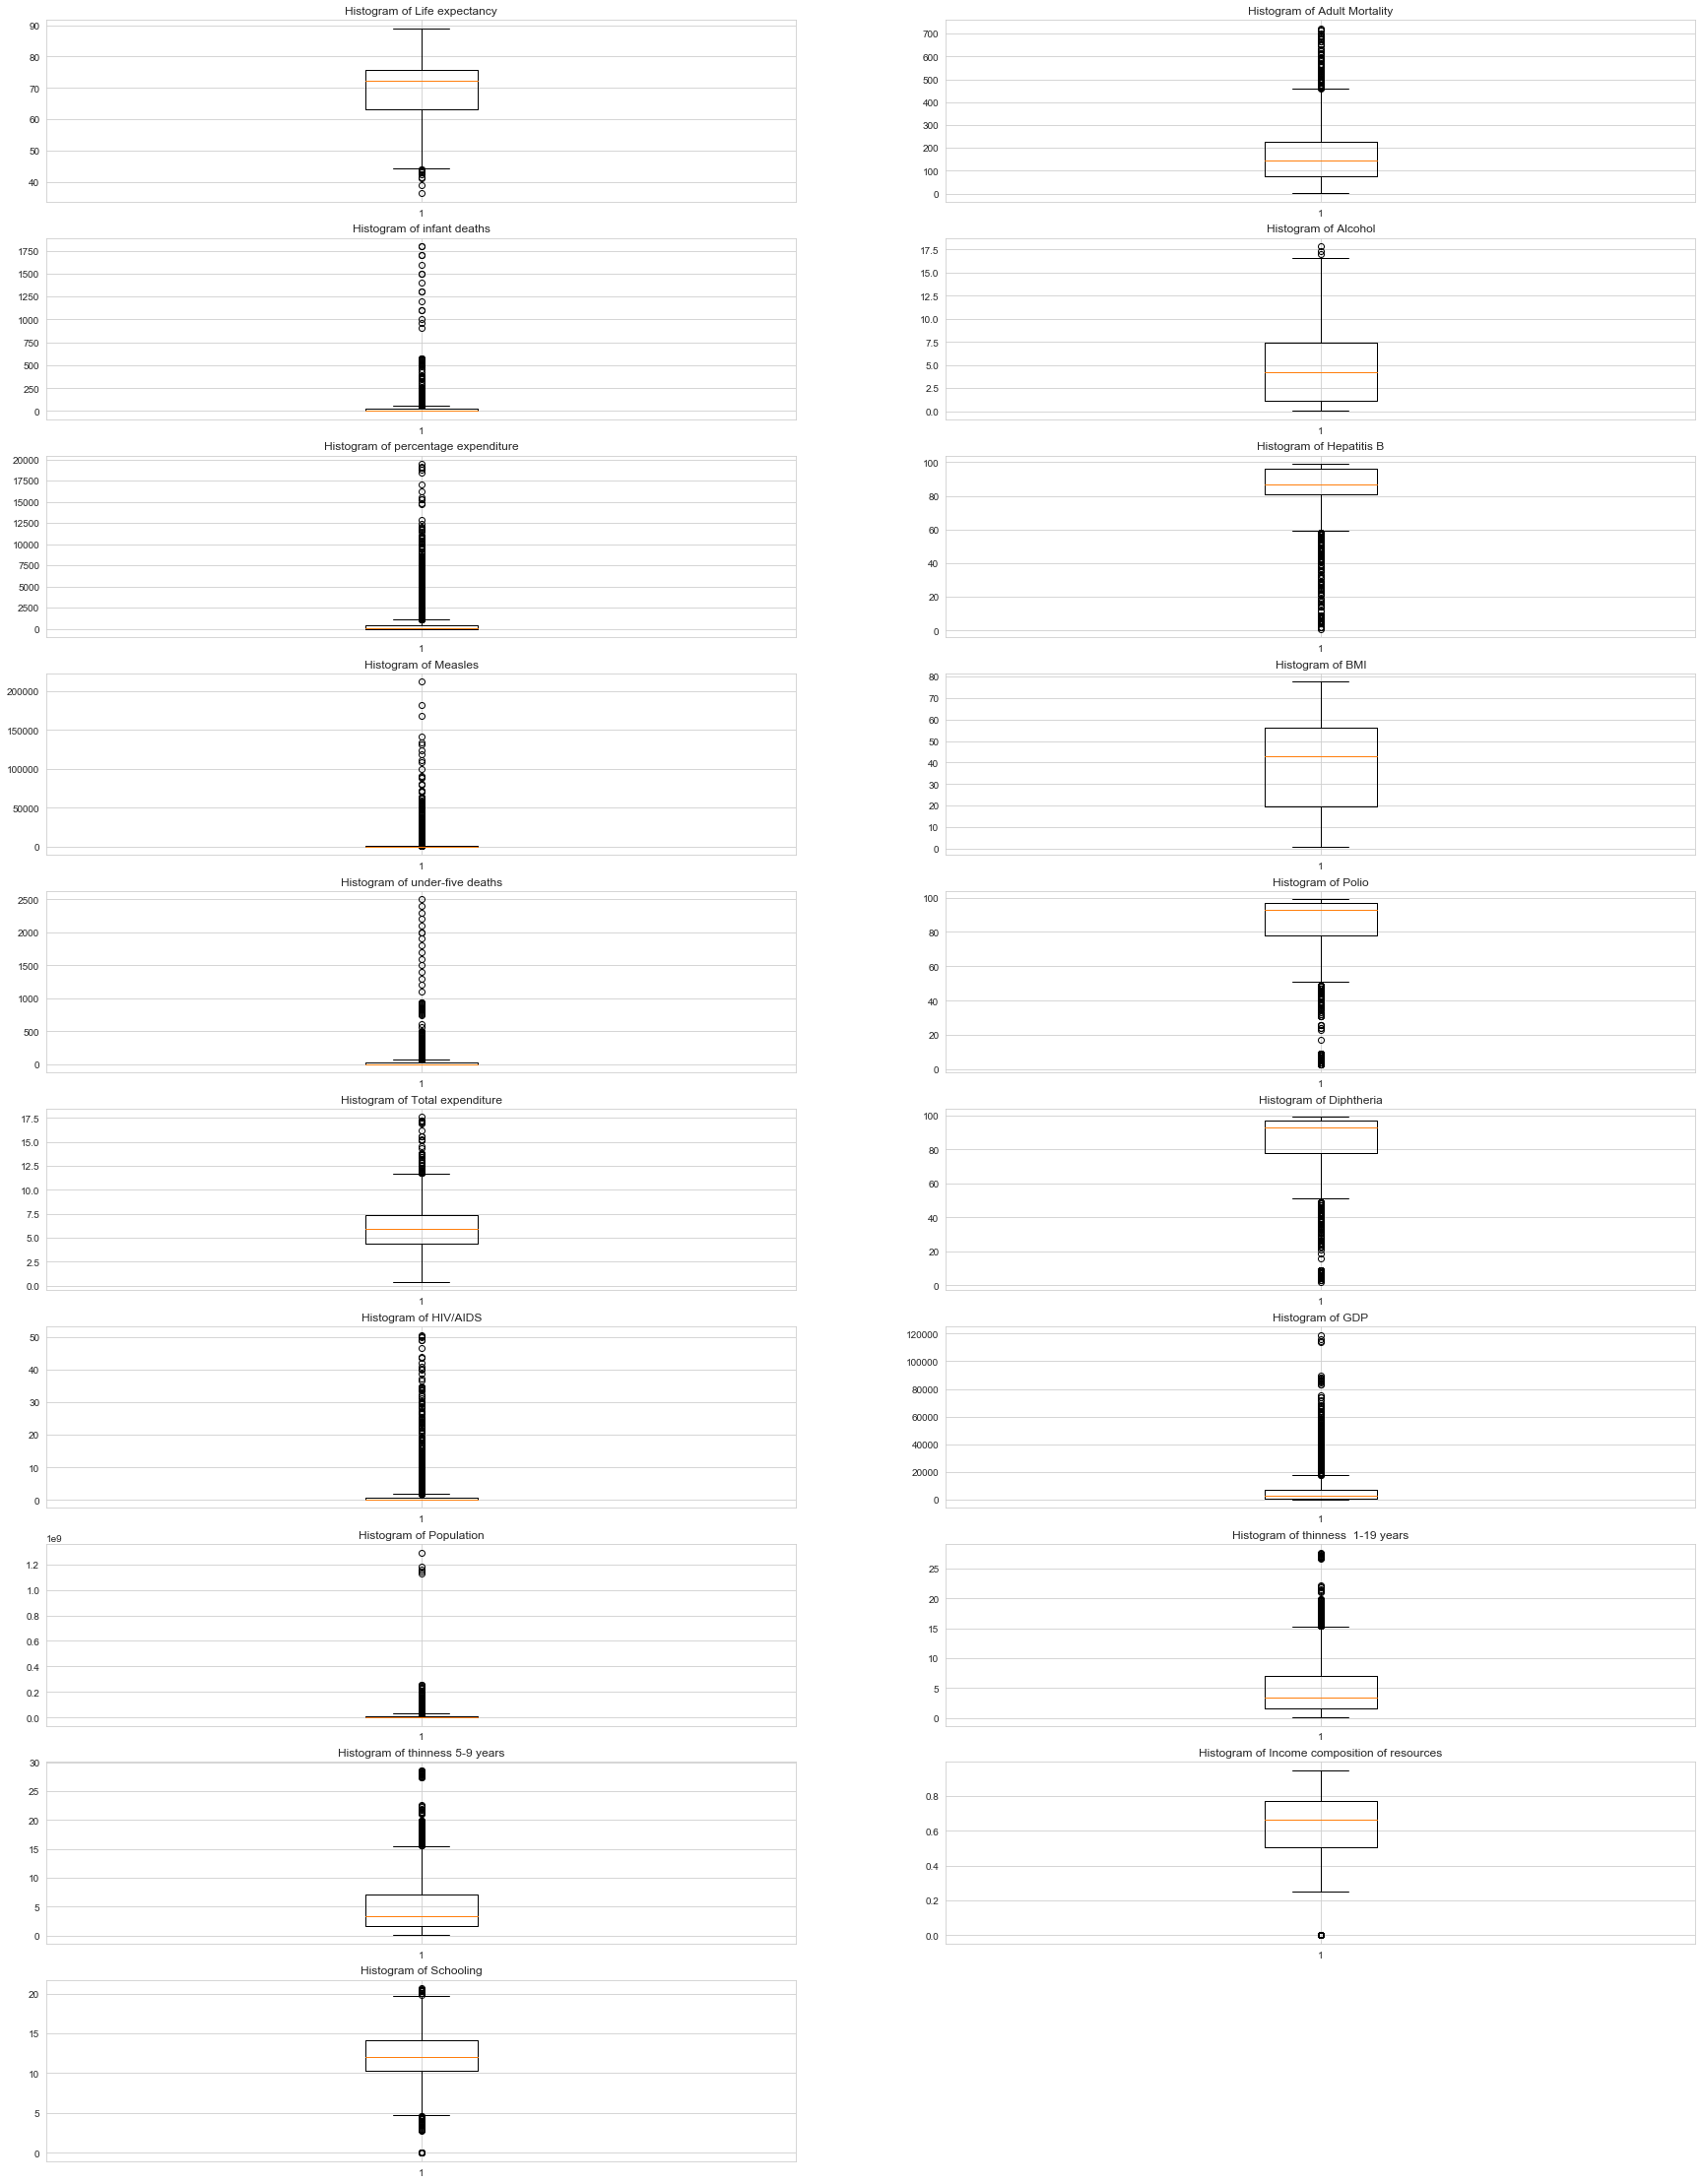

In [35]:

plt.figure(figsize=(30,40))

plt.subplot(10,2,1)
plt.boxplot(life_expectancy_cg["Life expectancy"])
plt.title("Histogram of Life expectancy")

plt.subplot(10,2,2)
plt.boxplot(life_expectancy_cg["Adult Mortality"])
plt.title("Histogram of Adult Mortality")

plt.subplot(10,2,3)
plt.boxplot(life_expectancy_cg["infant deaths"])
plt.title("Histogram of infant deaths")

plt.subplot(10,2,4)
plt.boxplot(life_expectancy_cg["Alcohol"])
plt.title("Histogram of Alcohol")

plt.subplot(10,2,5)
plt.boxplot(life_expectancy_cg["percentage expenditure"])
plt.title("Histogram of percentage expenditure")

plt.subplot(10,2,6)
plt.boxplot(life_expectancy_cg["Hepatitis B"])
plt.title("Histogram of Hepatitis B")

plt.subplot(10,2,7)
plt.boxplot(life_expectancy_cg["Measles"])
plt.title("Histogram of Measles")

plt.subplot(10,2,8)
plt.boxplot(life_expectancy_cg["BMI"])
plt.title("Histogram of BMI")

plt.subplot(10,2,9)
plt.boxplot(life_expectancy_cg["under-five deaths"])
plt.title("Histogram of under-five deaths")

plt.subplot(10,2,10)
plt.boxplot(life_expectancy_cg["Polio"])
plt.title("Histogram of Polio")

plt.subplot(10,2,11)
plt.boxplot(life_expectancy_cg["Total expenditure"])
plt.title("Histogram of Total expenditure")

plt.subplot(10,2,12)
plt.boxplot(life_expectancy_cg["Diphtheria"])
plt.title("Histogram of Diphtheria")

plt.subplot(10,2,13)
plt.boxplot(life_expectancy_cg["HIV/AIDS"])
plt.title("Histogram of HIV/AIDS")

plt.subplot(10,2,14)
plt.boxplot(life_expectancy_cg["GDP"])
plt.title("Histogram of GDP")

plt.subplot(10,2,15)
plt.boxplot(life_expectancy_cg["Population"])
plt.title("Histogram of Population")

plt.subplot(10,2,16)
plt.boxplot(life_expectancy_cg["thinness  1-19 years"])
plt.title("Histogram of thinness  1-19 years")

plt.subplot(10,2,17)
plt.boxplot(life_expectancy_cg["thinness 5-9 years"])
plt.title("Histogram of thinness 5-9 years")

plt.subplot(10,2,18)
plt.boxplot(life_expectancy_cg["Income composition of resources"])
plt.title("Histogram of Income composition of resources")

plt.subplot(10,2,19)
plt.boxplot(life_expectancy_cg["Schooling"])
plt.title("Histogram of Schooling")


plt.show()


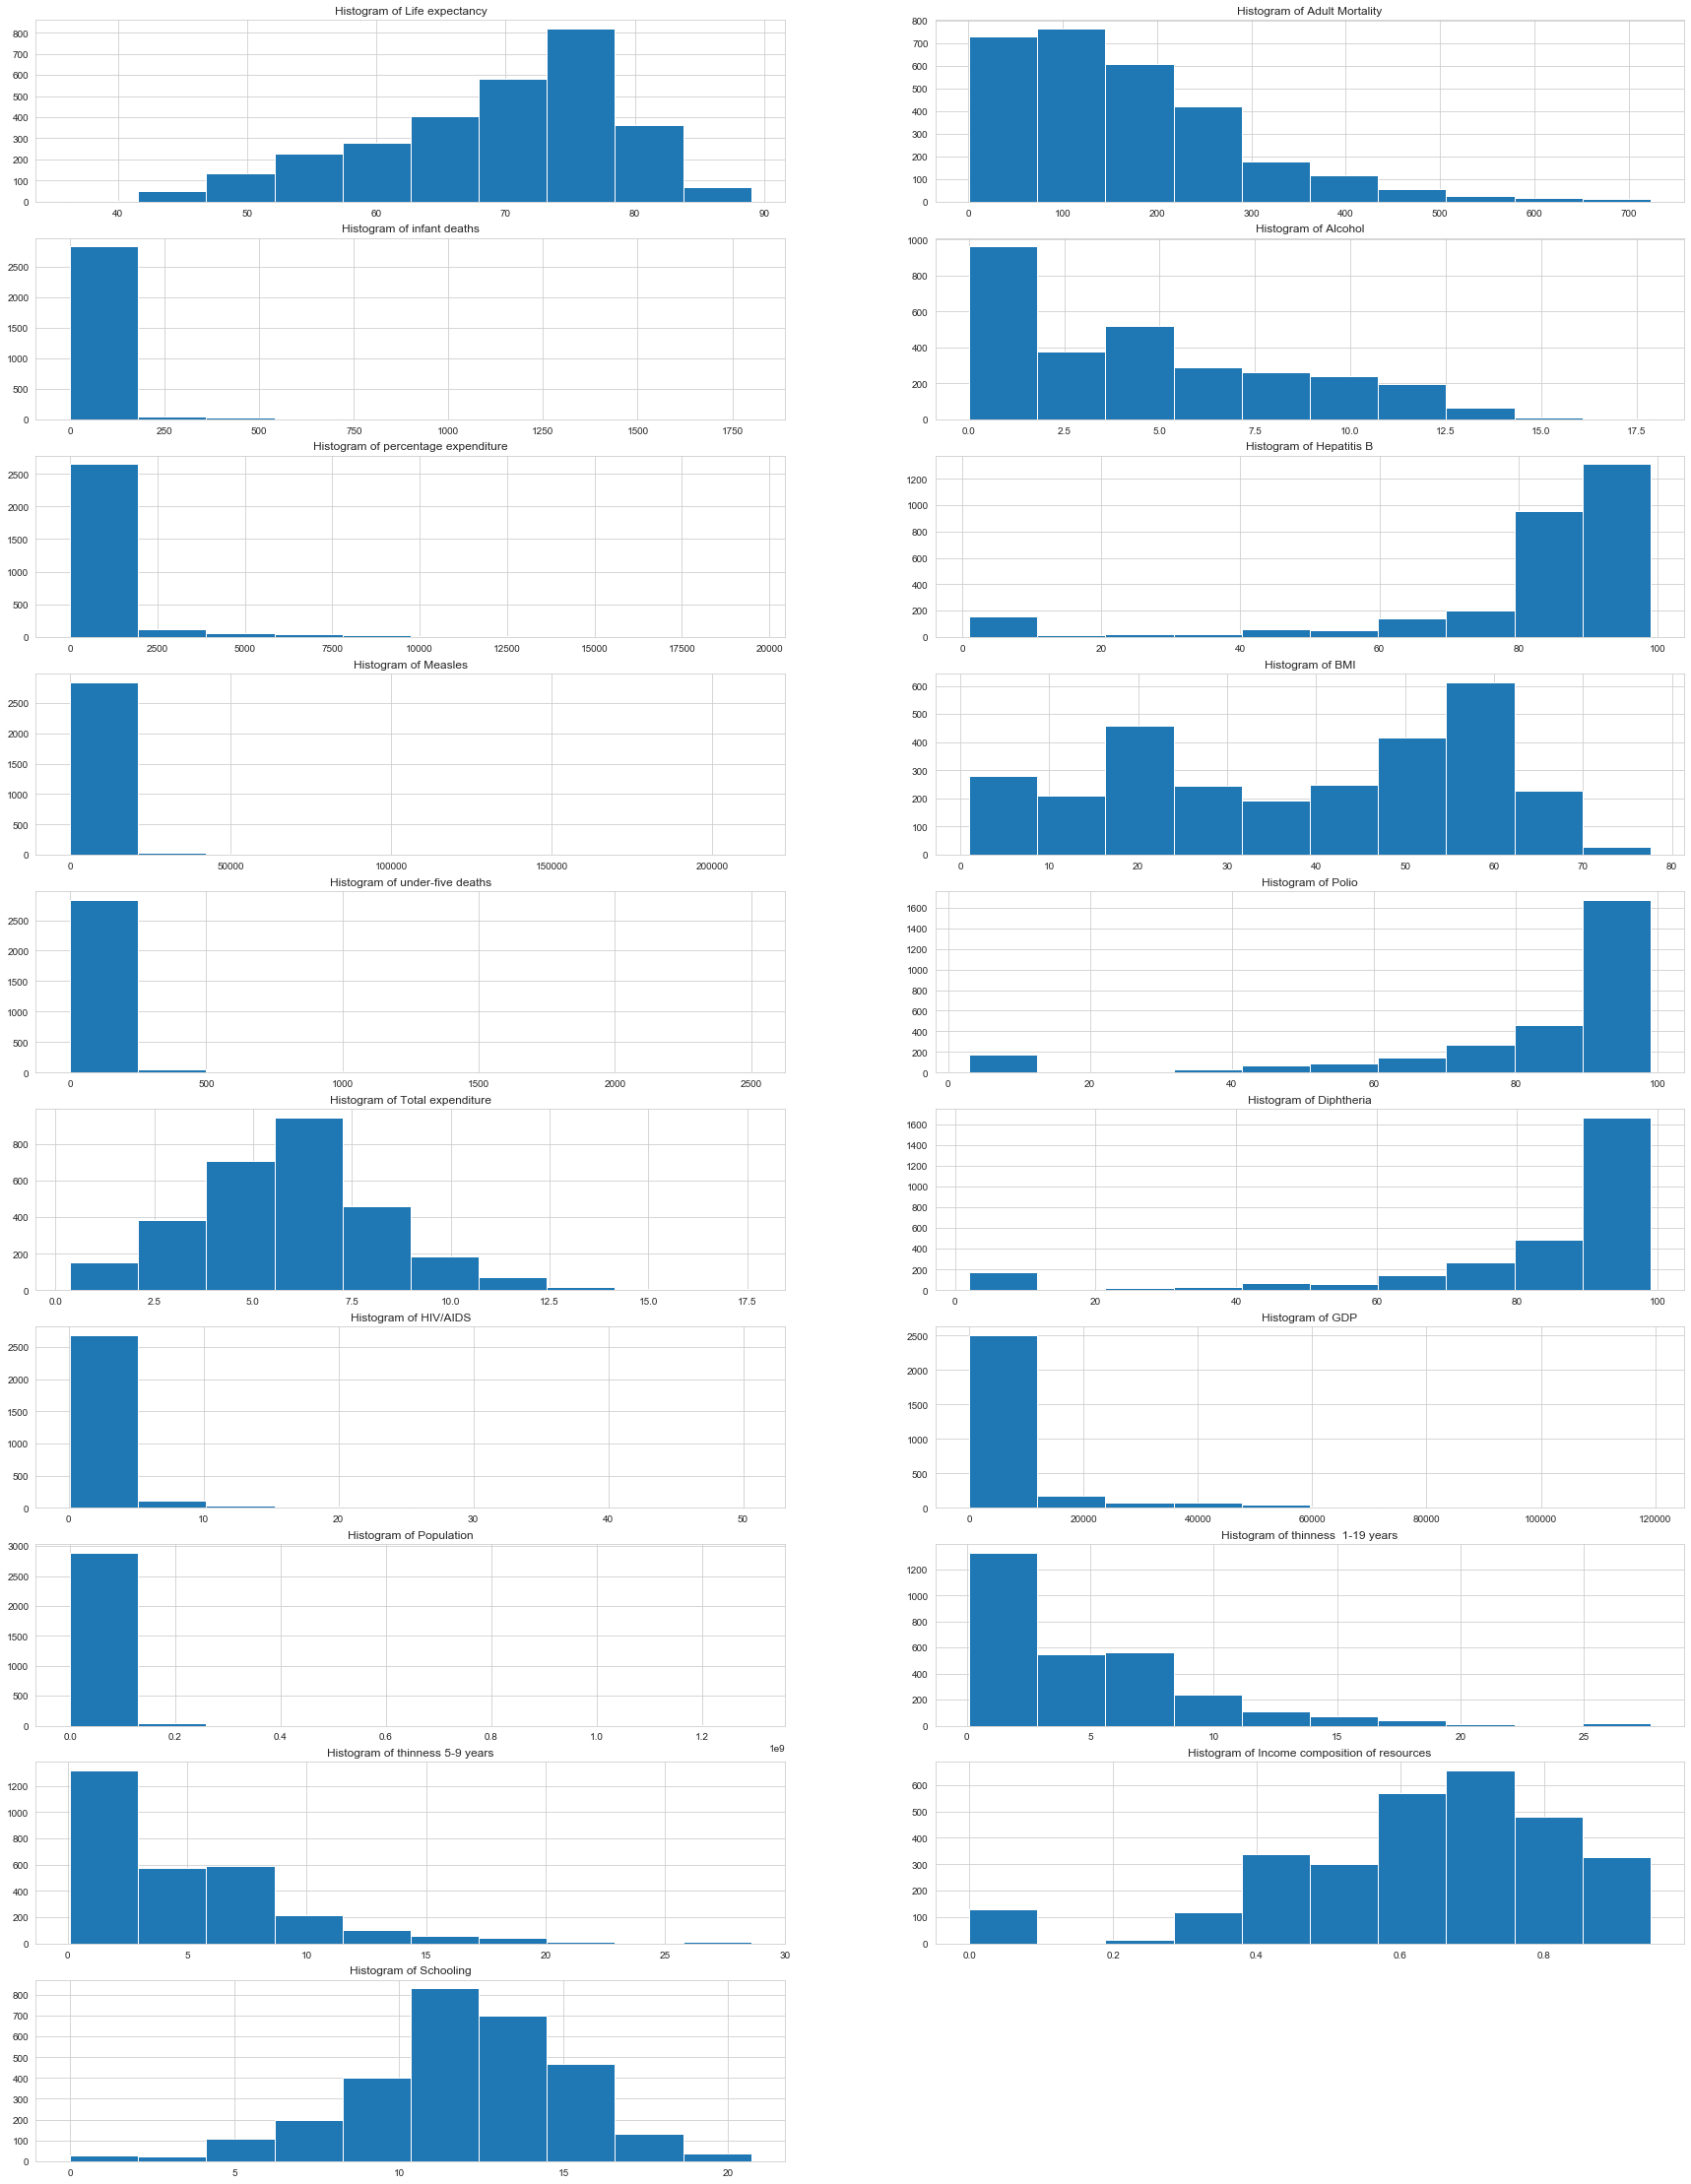

In [36]:
plt.figure(figsize=(30,40))

plt.subplot(10,2,1)
plt.hist(life_expectancy_cg["Life expectancy"])
plt.title("Histogram of Life expectancy")

plt.subplot(10,2,2)
plt.hist(life_expectancy_cg["Adult Mortality"])
plt.title("Histogram of Adult Mortality")

plt.subplot(10,2,3)
plt.hist(life_expectancy_cg["infant deaths"])
plt.title("Histogram of infant deaths")

plt.subplot(10,2,4)
plt.hist(life_expectancy_cg["Alcohol"])
plt.title("Histogram of Alcohol")

plt.subplot(10,2,5)
plt.hist(life_expectancy_cg["percentage expenditure"])
plt.title("Histogram of percentage expenditure")

plt.subplot(10,2,6)
plt.hist(life_expectancy_cg["Hepatitis B"])
plt.title("Histogram of Hepatitis B")

plt.subplot(10,2,7)
plt.hist(life_expectancy_cg["Measles"])
plt.title("Histogram of Measles")

plt.subplot(10,2,8)
plt.hist(life_expectancy_cg["BMI"])
plt.title("Histogram of BMI")

plt.subplot(10,2,9)
plt.hist(life_expectancy_cg["under-five deaths"])
plt.title("Histogram of under-five deaths")

plt.subplot(10,2,10)
plt.hist(life_expectancy_cg["Polio"])
plt.title("Histogram of Polio")

plt.subplot(10,2,11)
plt.hist(life_expectancy_cg["Total expenditure"])
plt.title("Histogram of Total expenditure")

plt.subplot(10,2,12)
plt.hist(life_expectancy_cg["Diphtheria"])
plt.title("Histogram of Diphtheria")

plt.subplot(10,2,13)
plt.hist(life_expectancy_cg["HIV/AIDS"])
plt.title("Histogram of HIV/AIDS")

plt.subplot(10,2,14)
plt.hist(life_expectancy_cg["GDP"])
plt.title("Histogram of GDP")

plt.subplot(10,2,15)
plt.hist(life_expectancy_cg["Population"])
plt.title("Histogram of Population")

plt.subplot(10,2,16)
plt.hist(life_expectancy_cg["thinness  1-19 years"])
plt.title("Histogram of thinness  1-19 years")

plt.subplot(10,2,17)
plt.hist(life_expectancy_cg["thinness 5-9 years"])
plt.title("Histogram of thinness 5-9 years")

plt.subplot(10,2,18)
plt.hist(life_expectancy_cg["Income composition of resources"])
plt.title("Histogram of Income composition of resources")

plt.subplot(10,2,19)
plt.hist(life_expectancy_cg["Schooling"])
plt.title("Histogram of Schooling")


plt.show()


### Z-score to see outliers:


In [37]:
life_expectancy_cg.head()

Country  Year      Status  Life expectancy  \
Country                                                         
Afghanistan 0  Afghanistan  2015  Developing             65.0   
            1  Afghanistan  2014  Developing             59.9   
            2  Afghanistan  2013  Developing             59.9   
            3  Afghanistan  2012  Developing             59.5   
            4  Afghanistan  2011  Developing             59.2   

               Adult Mortality  infant deaths  Alcohol  \
Country                                                  
Afghanistan 0            263.0             62     0.01   
            1            271.0             64     0.01   
            2            268.0             66     0.01   
            3            272.0             69     0.01   
            4            275.0             71     0.01   

               percentage expenditure  Hepatitis B  Measles  ...  Polio  \
Country                                                      ...          
Afghanistan 0               71.279624         65.0     1154  ...    6.0   
            1               73.523582         62.0      492  ...   58.0   
            2               73.219243         64.0      430  ...   62.0   
            3               78.184215         67.0     2787  ...   67.0   
            4                7.097109         68.0     3013  ...   68.0   

               Total expenditure  Diphtheria  HIV/AIDS         GDP  \
Country                                                              
Afghanistan 0               8.16        65.0       0.1  584.259210   
            1               8.18        62.0       0.1  612.696514   
            2               8.13        64.0       0.1  631.744976   
            3               8.52        67.0       0.1  669.959000   
            4               7.87        68.0       0.1   63.537231   

               Population  thinness  1-19 years  thinness 5-9 years  \
Country                                                               
Afghanistan 0  33736494.0                  17.2                17.3   
            1    327582.0                  17.5                17.5   
            2  31731688.0                  17.7                17.7   
            3   3696958.0                  17.9                18.0   
            4   2978599.0                  18.2                18.2   

               Income composition of resources  Schooling  
Country                                                    
Afghanistan 0                            0.479       10.1  
            1                            0.476       10.0  
            2                            0.470        9.9  
            3                            0.463        9.8  
            4                            0.454        9.5  

[5 rows x 22 columns]

In [38]:
life_exp_z= life_expectancy_cg[["Life expectancy","Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", "Hepatitis B",
                                    "Measles","BMI", "under-five deaths", "Polio", "Total expenditure", "Diphtheria", "HIV/AIDS",
                                   "GDP", "Population", "thinness  1-19 years", "thinness 5-9 years", "Income composition of resources",
                                   "Schooling"
                                    ]]

life_exp_z.head()

Life expectancy  Adult Mortality  infant deaths  Alcohol  \
Country                                                                   
Afghanistan 0             65.0            263.0             62     0.01   
            1             59.9            271.0             64     0.01   
            2             59.9            268.0             66     0.01   
            3             59.5            272.0             69     0.01   
            4             59.2            275.0             71     0.01   

               percentage expenditure  Hepatitis B  Measles   BMI  \
Country                                                             
Afghanistan 0               71.279624         65.0     1154  19.1   
            1               73.523582         62.0      492  18.6   
            2               73.219243         64.0      430  18.1   
            3               78.184215         67.0     2787  17.6   
            4                7.097109         68.0     3013  17.2   

               under-five deaths  Polio  Total expenditure  Diphtheria  \
Country                                                                  
Afghanistan 0                 83    6.0               8.16        65.0   
            1                 86   58.0               8.18        62.0   
            2                 89   62.0               8.13        64.0   
            3                 93   67.0               8.52        67.0   
            4                 97   68.0               7.87        68.0   

               HIV/AIDS         GDP  Population  thinness  1-19 years  \
Country                                                                 
Afghanistan 0       0.1  584.259210  33736494.0                  17.2   
            1       0.1  612.696514    327582.0                  17.5   
            2       0.1  631.744976  31731688.0                  17.7   
            3       0.1  669.959000   3696958.0                  17.9   
            4       0.1   63.537231   2978599.0                  18.2   

               thinness 5-9 years  Income composition of resources  Schooling  
Country                                                                        
Afghanistan 0                17.3                            0.479       10.1  
            1                17.5                            0.476       10.0  
            2                17.7                            0.470        9.9  
            3                18.0                            0.463        9.8  
            4                18.2                            0.454        9.5

In [39]:
from scipy.stats import zscore
import scipy



life_exp_z.apply(scipy.stats.zscore)



Life expectancy  Adult Mortality  infant deaths  \
Country                                                             
Afghanistan 0           -0.443691         0.790238       0.267520   
            1           -0.979279         0.854614       0.284455   
            2           -0.979279         0.830473       0.301391   
            3           -1.021286         0.862660       0.326794   
            4           -1.052791         0.886801       0.343730   
            5           -1.094798         0.918989       0.369134   
            6           -1.115802         0.935083       0.394537   
            7           -1.168310         0.983365       0.419940   
            8           -1.231321         1.047740       0.436876   
            9           -1.252324         1.047740       0.453812   
            10          -1.252324         1.015552       0.462279   
            11          -1.283829         1.031646       0.479215   
            12          -1.315334         1.047740       0.479215   
            13          -1.367843        -1.301966       0.487683   
            14          -1.462359         1.216726       0.487683   
            15          -1.514867         1.256960       0.487683   
Albania     16           0.900530        -0.730634      -0.257484   
            17           0.869025        -1.261731      -0.257484   
            18           0.837520        -0.650164      -0.257484   
            19           0.806015        -0.634070      -0.257484   
            20           0.774510        -0.617976      -0.257484   
            21           0.732503        -0.593836      -0.249017   
            22           0.722001        -0.593836      -0.249017   
            23           0.637987        -1.318060      -0.249017   
            24           0.700998        -1.253685      -0.249017   
            25           0.522468        -0.529460      -0.249017   
            26           0.448956        -1.205403      -0.249017   
            27           0.396447        -1.189309      -0.249017   
            28           0.375444        -1.181262      -0.249017   
            29           0.427953        -1.205403      -0.249017   
...                           ...              ...            ...   
Zambia      2908        -0.653725         1.313289      -0.011918   
            2909        -1.052791         1.482275      -0.011918   
            2910        -1.157809         1.619073      -0.011918   
            2911        -1.178812         1.594932      -0.003450   
            2912        -1.241822         1.635167      -0.003450   
            2913        -1.420352        -0.963995       0.005018   
            2914        -1.745905         2.592752       0.013485   
            2915        -1.178812         2.906583       0.021953   
            2916        -2.092462         3.131897       0.030421   
            2917        -2.239487         3.325024       0.047357   
            2918        -2.397013        -0.811103       0.072760   
            2919        -2.491528        -0.770868       0.089696   
            2920        -2.586044         3.590573       0.106631   
            2921        -2.670058         3.614714       0.115099   
Zimbabwe    2922        -0.233656         1.377665      -0.071193   
            2923        -1.052791         1.659307      -0.062725   
            2924        -1.178812         1.884622      -0.045789   
            2925        -1.325836         2.126030      -0.037321   
            2926        -1.504366         2.407673      -0.020386   
            2927        -1.766909         2.914630      -0.011918   
            2928        -2.018950         3.397446      -0.003450   
            2929        -2.207981         3.759559      -0.003450   
            2930        -2.376009        -0.786962      -0.011918   
            2931        -2.502030        -1.269778      -0.020386   
            2932        -2.586044         4.443548      -0.020386   
            2933

In [40]:
#Statistical methods to detect outliers

life_exp_z[life_exp_z.apply(scipy.stats.zscore)>3].sum()
   
    


Life expectancy                    0.000000e+00
Adult Mortality                    2.485100e+04
infant deaths                      3.258300e+04
Alcohol                            6.875000e+01
percentage expenditure             8.495340e+05
Hepatitis B                        0.000000e+00
Measles                            3.660415e+06
BMI                                0.000000e+00
under-five deaths                  4.379900e+04
Polio                              0.000000e+00
Total expenditure                  3.746100e+02
Diphtheria                         0.000000e+00
HIV/AIDS                           2.001500e+03
GDP                                5.604526e+06
Population                         9.649393e+09
thinness  1-19 years               1.173400e+03
thinness 5-9 years                 1.263600e+03
Income composition of resources    0.000000e+00
Schooling                          0.000000e+00
dtype: float64

In [41]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(life_exp_z, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_exp_z > max_val) 
                      | (life_exp_z < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 8759
The score threshold is: 1.5
Number of outliers is: 8222
The score threshold is: 2.0
Number of outliers is: 7803
The score threshold is: 2.5
Number of outliers is: 7490
The score threshold is: 3.0
Number of outliers is: 7183
The score threshold is: 3.5
Number of outliers is: 6981
The score threshold is: 4.0
Number of outliers is: 6769
The score threshold is: 4.5
Number of outliers is: 6618


In [42]:
#winsorization
from scipy.stats.mstats import winsorize

life_expectancy_cg["winsorized_Life"] = winsorized_views = winsorize(life_expectancy_cg["Life expectancy"], (0.05, 0.05))
life_expectancy_cg["winsorized_Adult"] = winsorized_views = winsorize(life_expectancy_cg["Adult Mortality"], (0.05, 0.05))
life_expectancy_cg["winsorized_infant"] = winsorized_views = winsorize(life_expectancy_cg["infant deaths"], (0.05, 0.05))
life_expectancy_cg["winsorized_Alcohol"] = winsorized_views = winsorize(life_expectancy_cg["Alcohol"], (0.05, 0.05))
life_expectancy_cg["winsorized_perexp"] = winsorized_views = winsorize(life_expectancy_cg["percentage expenditure"], (0.05, 0.05))
life_expectancy_cg["winsorized_Hep"] = winsorized_views = winsorize(life_expectancy_cg["Hepatitis B"], (0.05, 0.05))
life_expectancy_cg["winsorized_Measles"] = winsorized_views = winsorize(life_expectancy_cg["Measles"], (0.05, 0.05))
life_expectancy_cg["winsorized_BMI"]=winsorized_views = winsorize(life_expectancy_cg["BMI"], (0.05, 0.05))
life_expectancy_cg["winsorized_under-five"]=winsorized_views = winsorize(life_expectancy_cg["under-five deaths"], (0.05, 0.05))
life_expectancy_cg["winsorized_Polio"]=winsorized_views= winsorize(life_expectancy_cg["Polio"], (0.05, 0.05))
life_expectancy_cg["winsorized_Totexp"]=winsorized_views= winsorize(life_expectancy_cg["Total expenditure"], (0.05, 0.05))
life_expectancy_cg["winsorized_Diphtheria"]=winsorized_views = winsorize(life_expectancy_cg["Diphtheria"], (0.05, 0.05))
life_expectancy_cg["winsorized_HIV/AIDS"]=winsorized_views = winsorize(life_expectancy_cg["HIV/AIDS"], (0.05, 0.05))
life_expectancy_cg["winsorized_GDP"]=winsorized_views = winsorize(life_expectancy_cg["GDP"], (0.05, 0.05))
life_expectancy_cg["winsorized_Pop"]=winsorized_views = winsorize(life_expectancy_cg["Population"], (0.05, 0.05))
life_expectancy_cg["winsorized_thin1"]=winsorized_views = winsorize(life_expectancy_cg["thinness  1-19 years"], (0.05, 0.05))
life_expectancy_cg["winsorized_thin5"]=winsorized_views = winsorize(life_expectancy_cg["thinness 5-9 years"], (0.05, 0.05))
life_expectancy_cg["winsorized_Inc"]=winsorized_views = winsorize(life_expectancy_cg["Income composition of resources"], (0.05, 0.05))
life_expectancy_cg["winsorized_Sch"]=winsorized_views = winsorize(life_expectancy_cg["Schooling"], (0.05, 0.05))



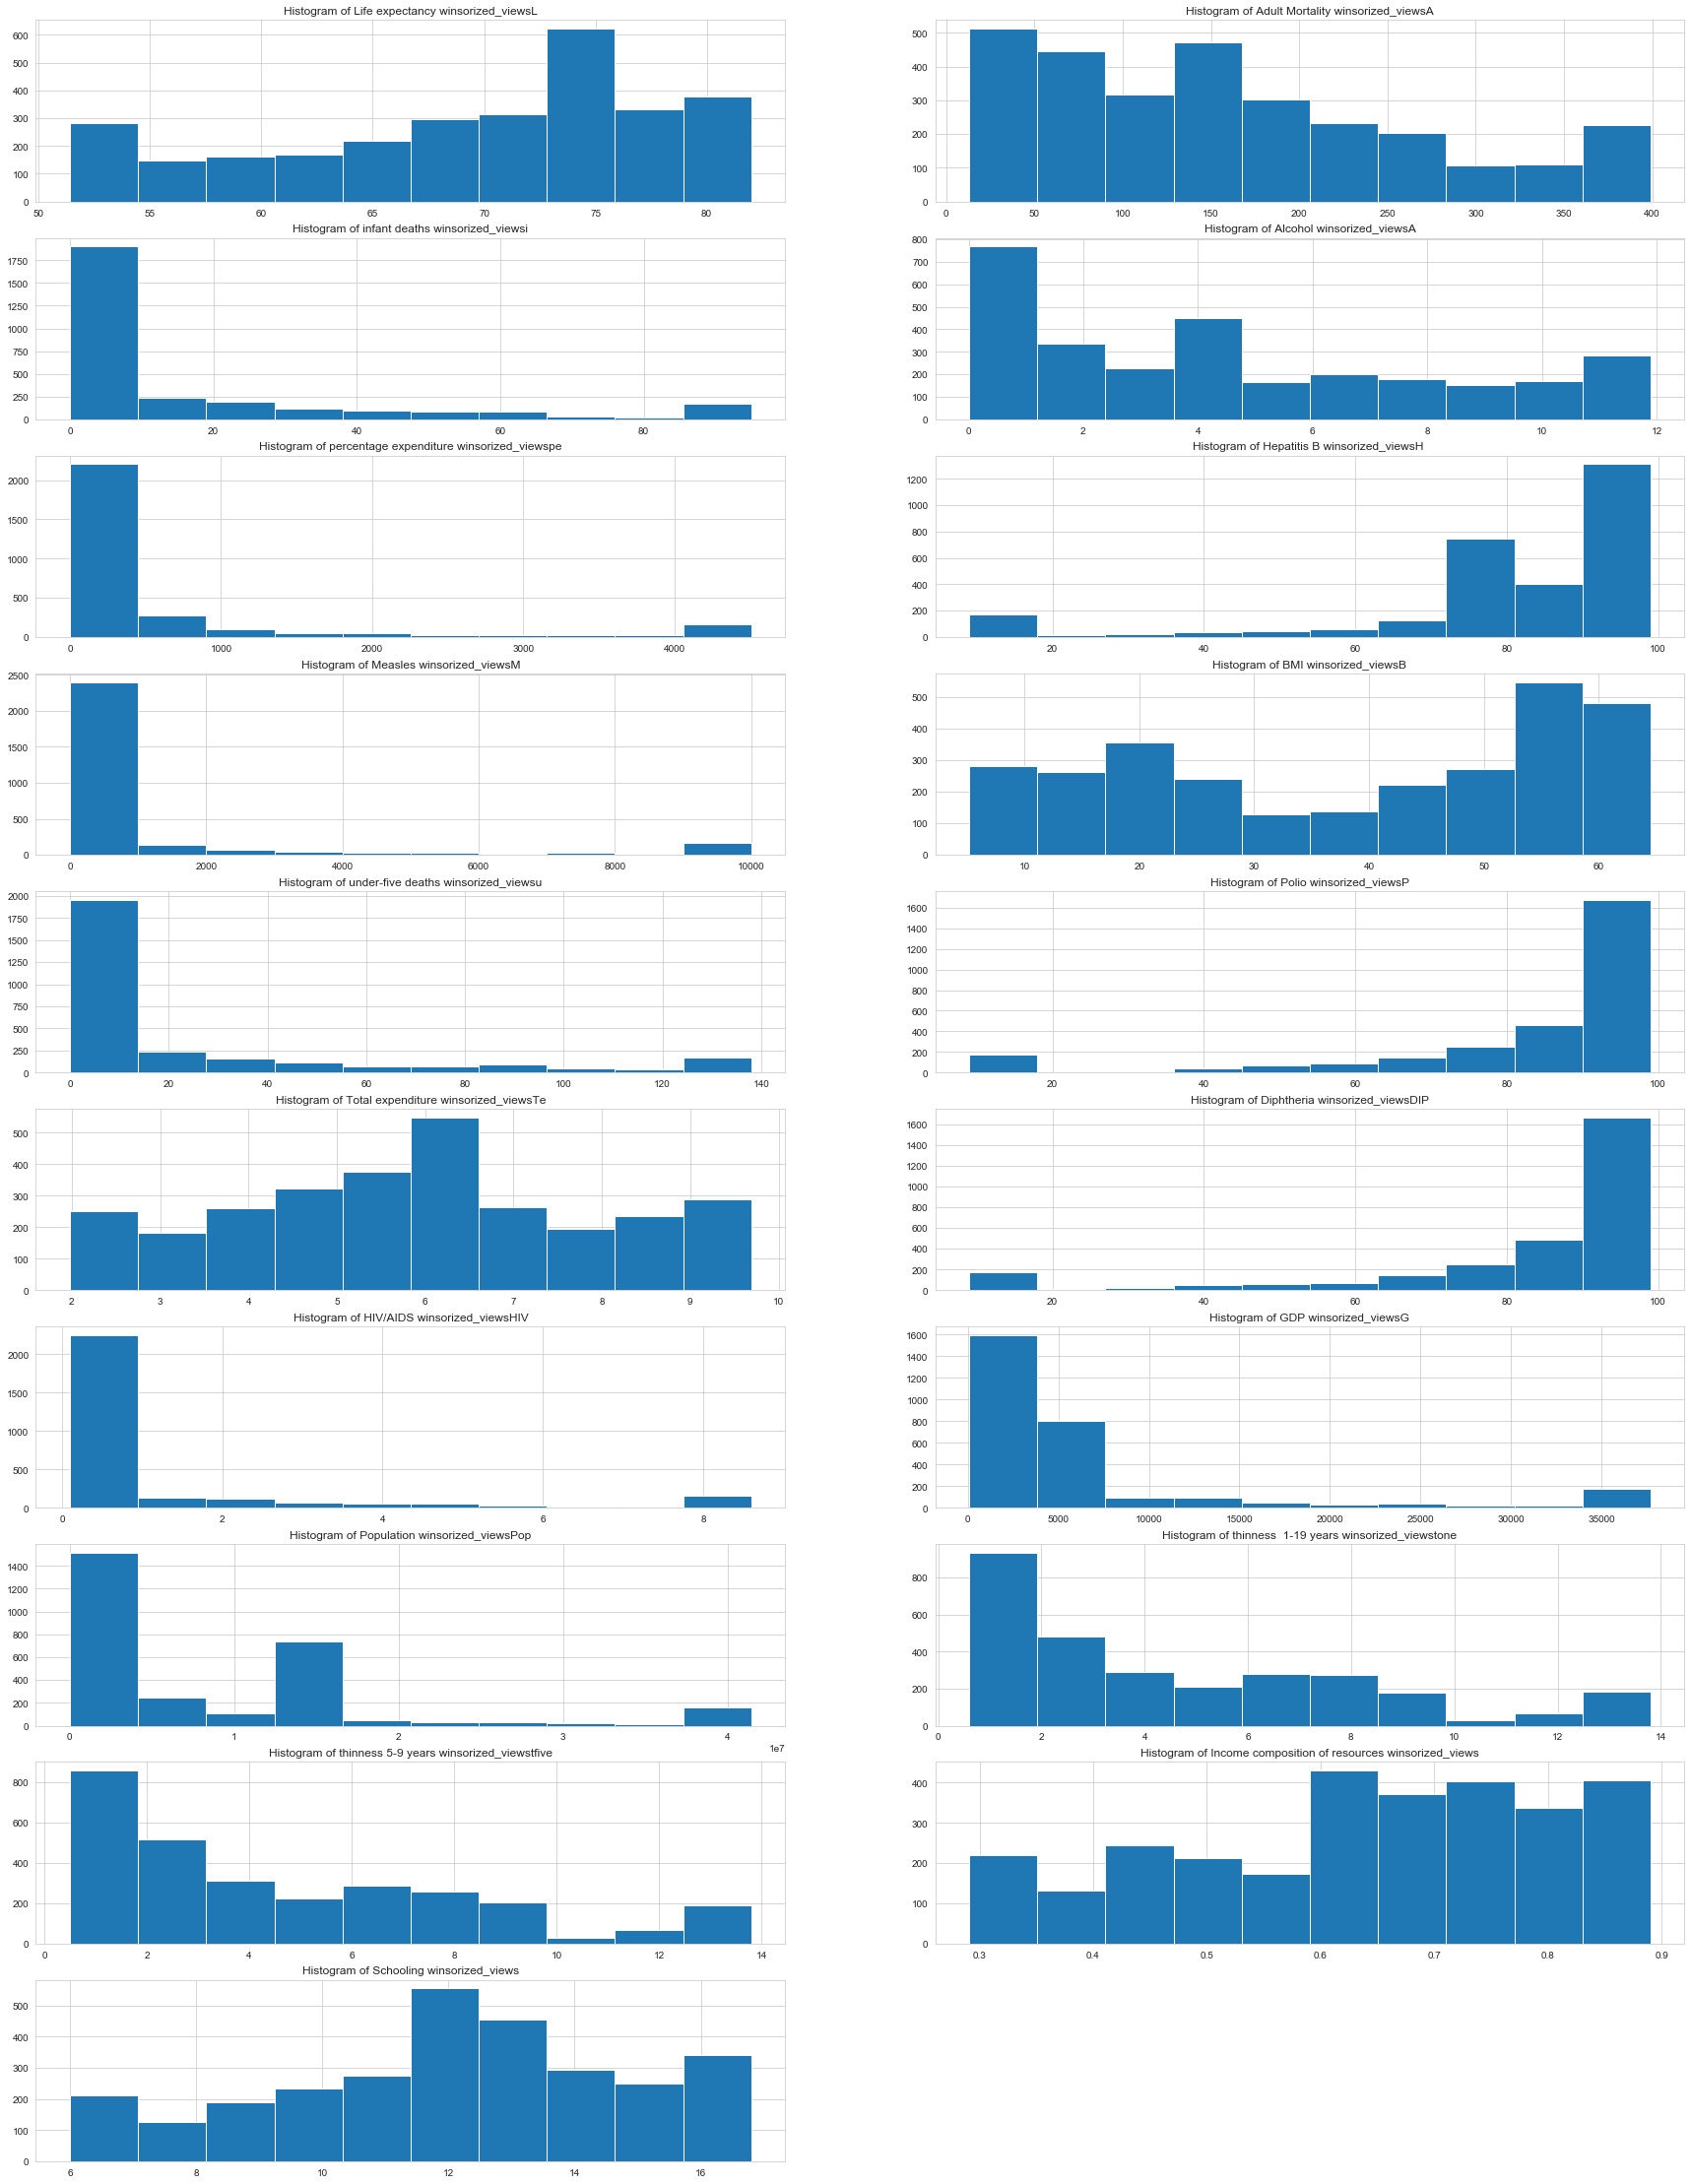

In [43]:
plt.figure(figsize=(30,40))

plt.subplot(10,2,1)
plt.hist(life_expectancy_cg["winsorized_Life"])
plt.title("Histogram of Life expectancy winsorized_viewsL")

plt.subplot(10,2,2)
plt.hist(life_expectancy_cg["winsorized_Adult"])
plt.title("Histogram of Adult Mortality winsorized_viewsA")

plt.subplot(10,2,3)
plt.hist(life_expectancy_cg["winsorized_infant"])
plt.title("Histogram of infant deaths winsorized_viewsi")

plt.subplot(10,2,4)
plt.hist(life_expectancy_cg["winsorized_Alcohol"])
plt.title("Histogram of Alcohol winsorized_viewsA")

plt.subplot(10,2,5)
plt.hist(life_expectancy_cg["winsorized_perexp"])
plt.title("Histogram of percentage expenditure winsorized_viewspe")

plt.subplot(10,2,6)
plt.hist(life_expectancy_cg["winsorized_Hep"])
plt.title("Histogram of Hepatitis B winsorized_viewsH ")

plt.subplot(10,2,7)
plt.hist(life_expectancy_cg["winsorized_Measles"])
plt.title("Histogram of Measles winsorized_viewsM")

plt.subplot(10,2,8)
plt.hist(life_expectancy_cg["winsorized_BMI"])
plt.title("Histogram of BMI winsorized_viewsB")

plt.subplot(10,2,9)
plt.hist(life_expectancy_cg["winsorized_under-five"])
plt.title("Histogram of under-five deaths winsorized_viewsu")

plt.subplot(10,2,10)
plt.hist(life_expectancy_cg["winsorized_Polio"])
plt.title("Histogram of Polio winsorized_viewsP")

plt.subplot(10,2,11)
plt.hist(life_expectancy_cg["winsorized_Totexp"])
plt.title("Histogram of Total expenditure winsorized_viewsTe")

plt.subplot(10,2,12)
plt.hist(life_expectancy_cg["winsorized_Diphtheria"])
plt.title("Histogram of Diphtheria winsorized_viewsDIP")

plt.subplot(10,2,13)
plt.hist(life_expectancy_cg["winsorized_HIV/AIDS"])
plt.title("Histogram of HIV/AIDS winsorized_viewsHIV")

plt.subplot(10,2,14)
plt.hist(life_expectancy_cg["winsorized_GDP"])
plt.title("Histogram of GDP winsorized_viewsG")

plt.subplot(10,2,15)
plt.hist(life_expectancy_cg["winsorized_Pop"])
plt.title("Histogram of Population winsorized_viewsPop")

plt.subplot(10,2,16)
plt.hist(life_expectancy_cg["winsorized_thin1"])
plt.title("Histogram of thinness  1-19 years winsorized_viewstone")

plt.subplot(10,2,17)
plt.hist(life_expectancy_cg["winsorized_thin5"])
plt.title("Histogram of thinness 5-9 years winsorized_viewstfive")

plt.subplot(10,2,18)
plt.hist(life_expectancy_cg["winsorized_Inc"])
plt.title("Histogram of Income composition of resources winsorized_views")

plt.subplot(10,2,19)
plt.hist(life_expectancy_cg["winsorized_Sch"])
plt.title("Histogram of Schooling winsorized_views")


plt.show()


plt.figure(figsize=(30,40))

plt.subplot(10,2,1)
plt.hist(np.log(life_expectancy_cg["Life expectancy"]))
plt.title("Histogram of Life expectancy")

plt.subplot(10,2,2)
plt.hist(np.log(life_expectancy_cg["Adult Mortality"]))
plt.title("Histogram of Adult Mortality")

plt.subplot(10,2,3)
plt.hist(np.log(life_expectancy_cg["infant deaths"]))
plt.title("Histogram of infant deaths")

plt.subplot(10,2,4)
plt.hist(np.log(life_expectancy_cg["Alcohol"]))
plt.title("Histogram of Alcohol")

plt.subplot(10,2,5)
plt.hist(np.log(life_expectancy_cg["percentage expenditure"]))
plt.title("Histogram of percentage expenditure")

plt.subplot(10,2,6)
plt.hist(np.log(life_expectancy_cg["Hepatitis B"]))
plt.title("Histogram of Hepatitis B")

plt.subplot(10,2,7)
plt.hist(np.log(life_expectancy_cg["Measles"]))
plt.title("Histogram of Measles")

plt.subplot(10,2,8)
plt.hist(np.log(life_expectancy_cg["BMI"]))
plt.title("Histogram of BMI")

plt.subplot(10,2,9)
plt.hist(np.log(life_expectancy_cg["under-five deaths"]))
plt.title("Histogram of under-five deaths")

plt.subplot(10,2,10)
plt.hist(np.log(life_expectancy_cg["Polio"]))
plt.title("Histogram of Polio")

plt.subplot(10,2,11)
plt.hist(np.log(life_expectancy_cg["Total expenditure"]))
plt.title("Histogram of Total expenditure")

plt.subplot(10,2,12)
plt.hist(np.log(life_expectancy_cg["Diphtheria"]))
plt.title("Histogram of Diphtheria")

plt.subplot(10,2,13)
plt.hist(np.log(life_expectancy_cg["HIV/AIDS"]))
plt.title("Histogram of HIV/AIDS")

plt.subplot(10,2,14)
plt.hist(np.log(life_expectancy_cg["GDP"]))
plt.title("Histogram of GDP")

plt.subplot(10,2,15)
plt.hist(np.log(life_expectancy_cg["Population"]))
plt.title("Histogram of Population")

plt.subplot(10,2,16)
plt.hist(np.log(life_expectancy_cg["thinness  1-19 years"]))
plt.title("Histogram of thinness  1-19 years")

plt.subplot(10,2,17)
plt.hist(np.log(life_expectancy_cg["thinness 5-9 years"]))
plt.title("Histogram of thinness 5-9 years")

plt.subplot(10,2,18)
plt.hist(np.log(life_expectancy_cg["Income composition of resources"]))
plt.title("Histogram of Income composition of resources")

plt.subplot(10,2,19)
plt.hist(np.log(life_expectancy_cg["Schooling"]))
plt.title("Histogram of Schooling")


plt.show()


### Data Exploration:


In [67]:
life_expectancy_cg.head()

Country  Year      Status  Life expectancy  \
Country                                                         
Afghanistan 0  Afghanistan  2015  Developing             65.0   
            1  Afghanistan  2014  Developing             59.9   
            2  Afghanistan  2013  Developing             59.9   
            3  Afghanistan  2012  Developing             59.5   
            4  Afghanistan  2011  Developing             59.2   

               Adult Mortality  infant deaths  Alcohol  \
Country                                                  
Afghanistan 0            263.0             62     0.01   
            1            271.0             64     0.01   
            2            268.0             66     0.01   
            3            272.0             69     0.01   
            4            275.0             71     0.01   

               percentage expenditure  Hepatitis B  Measles  ...  \
Country                                                      ...   
Afghanistan 0               71.279624         65.0     1154  ...   
            1               73.523582         62.0      492  ...   
            2               73.219243         64.0      430  ...   
            3               78.184215         67.0     2787  ...   
            4                7.097109         68.0     3013  ...   

               winsorized_Polio  winsorized_Totexp  winsorized_Diphtheria  \
Country                                                                     
Afghanistan 0               9.0               8.16                   65.0   
            1              58.0               8.18                   62.0   
            2              62.0               8.13                   64.0   
            3              67.0               8.52                   67.0   
            4              68.0               7.87                   68.0   

               winsorized_HIV/AIDS  winsorized_GDP  winsorized_Pop  \
Country                                                              
Afghanistan 0                  0.1      584.259210      33736494.0   
            1                  0.1      612.696514        327582.0   
            2                  0.1      631.744976      31731688.0   
            3                  0.1      669.959000       3696958.0   
            4                  0.1       81.683884       2978599.0   

               winsorized_thin1  winsorized_thin5  winsorized_Inc  \
Country                                                             
Afghanistan 0              13.8              13.8           0.479   
            1              13.8              13.8           0.476   
            2              13.8              13.8           0.470   
            3              13.8              13.8           0.463   
            4              13.8              13.8           0.454   

               winsorized_Sch  
Country                        
Afghanistan 0            10.1  
            1            10.0  
            2             9.9  
            3             9.8  
            4             9.5  

[5 rows x 41 columns]

In [68]:
# get univariate statistics
life_expectancy_cg.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,...,82.633681,5.856905,82.410214,1.172439,6655.630007,8.253349e+06,4.665717,4.669845,0.639442,12.039461
std,4.61056,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,...,23.063088,2.097285,23.345420,2.259797,9692.490159,1.057540e+07,3.751267,3.766405,0.169871,2.880872
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,9.000000,1.980000,9.000000,0.100000,81.683884,1.492800e+04,0.600000,0.500000,0.291000,6.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,...,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,...,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,...,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,...,99.000000,9.690000,99.000000,8.600000,37698.785730,4.143156e+07,13.800000,13.800000,0.890000,16.800000


In [69]:
# descriptive statistics for just text-based variables
life_expectancy_cg.describe(include=['O'])

,Country,Status
count,2928,2928
unique,183,2
top,Thailand,Developing
freq,16,2416


In [70]:
# descriptive statistics for all variables
life_expectancy_cg.describe(include= 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch
count,2928,2928.00000,2928,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
unique,183,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Thailand,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.50000,NaN,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,...,82.633681,5.856905,82.410214,1.172439,6655.630007,8.253349e+06,4.665717,4.669845,0.639442,12.039461
std,NaN,4.61056,NaN,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,...,23.063088,2.097285,23.345420,2.259797,9692.490159,1.057540e+07,3.751267,3.766405,0.169871,2.880872
min,NaN,2000.00000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,9.000000,1.980000,9.000000,0.100000,81.683884,1.492800e+04,0.600000,0.500000,0.291000,6.000000
25%,NaN,2003.75000,NaN,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,...,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,NaN,2007.50000,NaN,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,...,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,NaN,2011.25000,NaN,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,...,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000


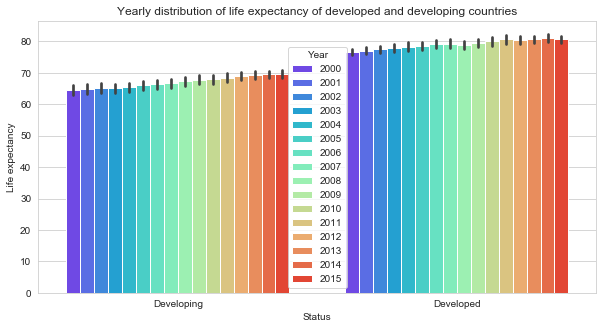

Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy, dtype: float64


In [89]:
# bar chart of grades
plt.figure(figsize=(10,5))
sns.barplot(life_expectancy_cg['Status'], life_expectancy_cg['Life expectancy'], hue=life_expectancy_cg['Year'], palette='rainbow')
plt.title('Yearly distribution of life expectancy of developed and developing countries' )
plt.show()
print(life_expectancy_cg.groupby('Status')['Life expectancy'].mean())

Developed countries looks like have higher ife expectancy than developing countries and it is increasing every year.

In [99]:
#t-test to find significance between two categorical variables


Bivariate analysis:

In [72]:
#sns.pairplot(life_expectancy_cg,palette='rainbow', dropna = False)

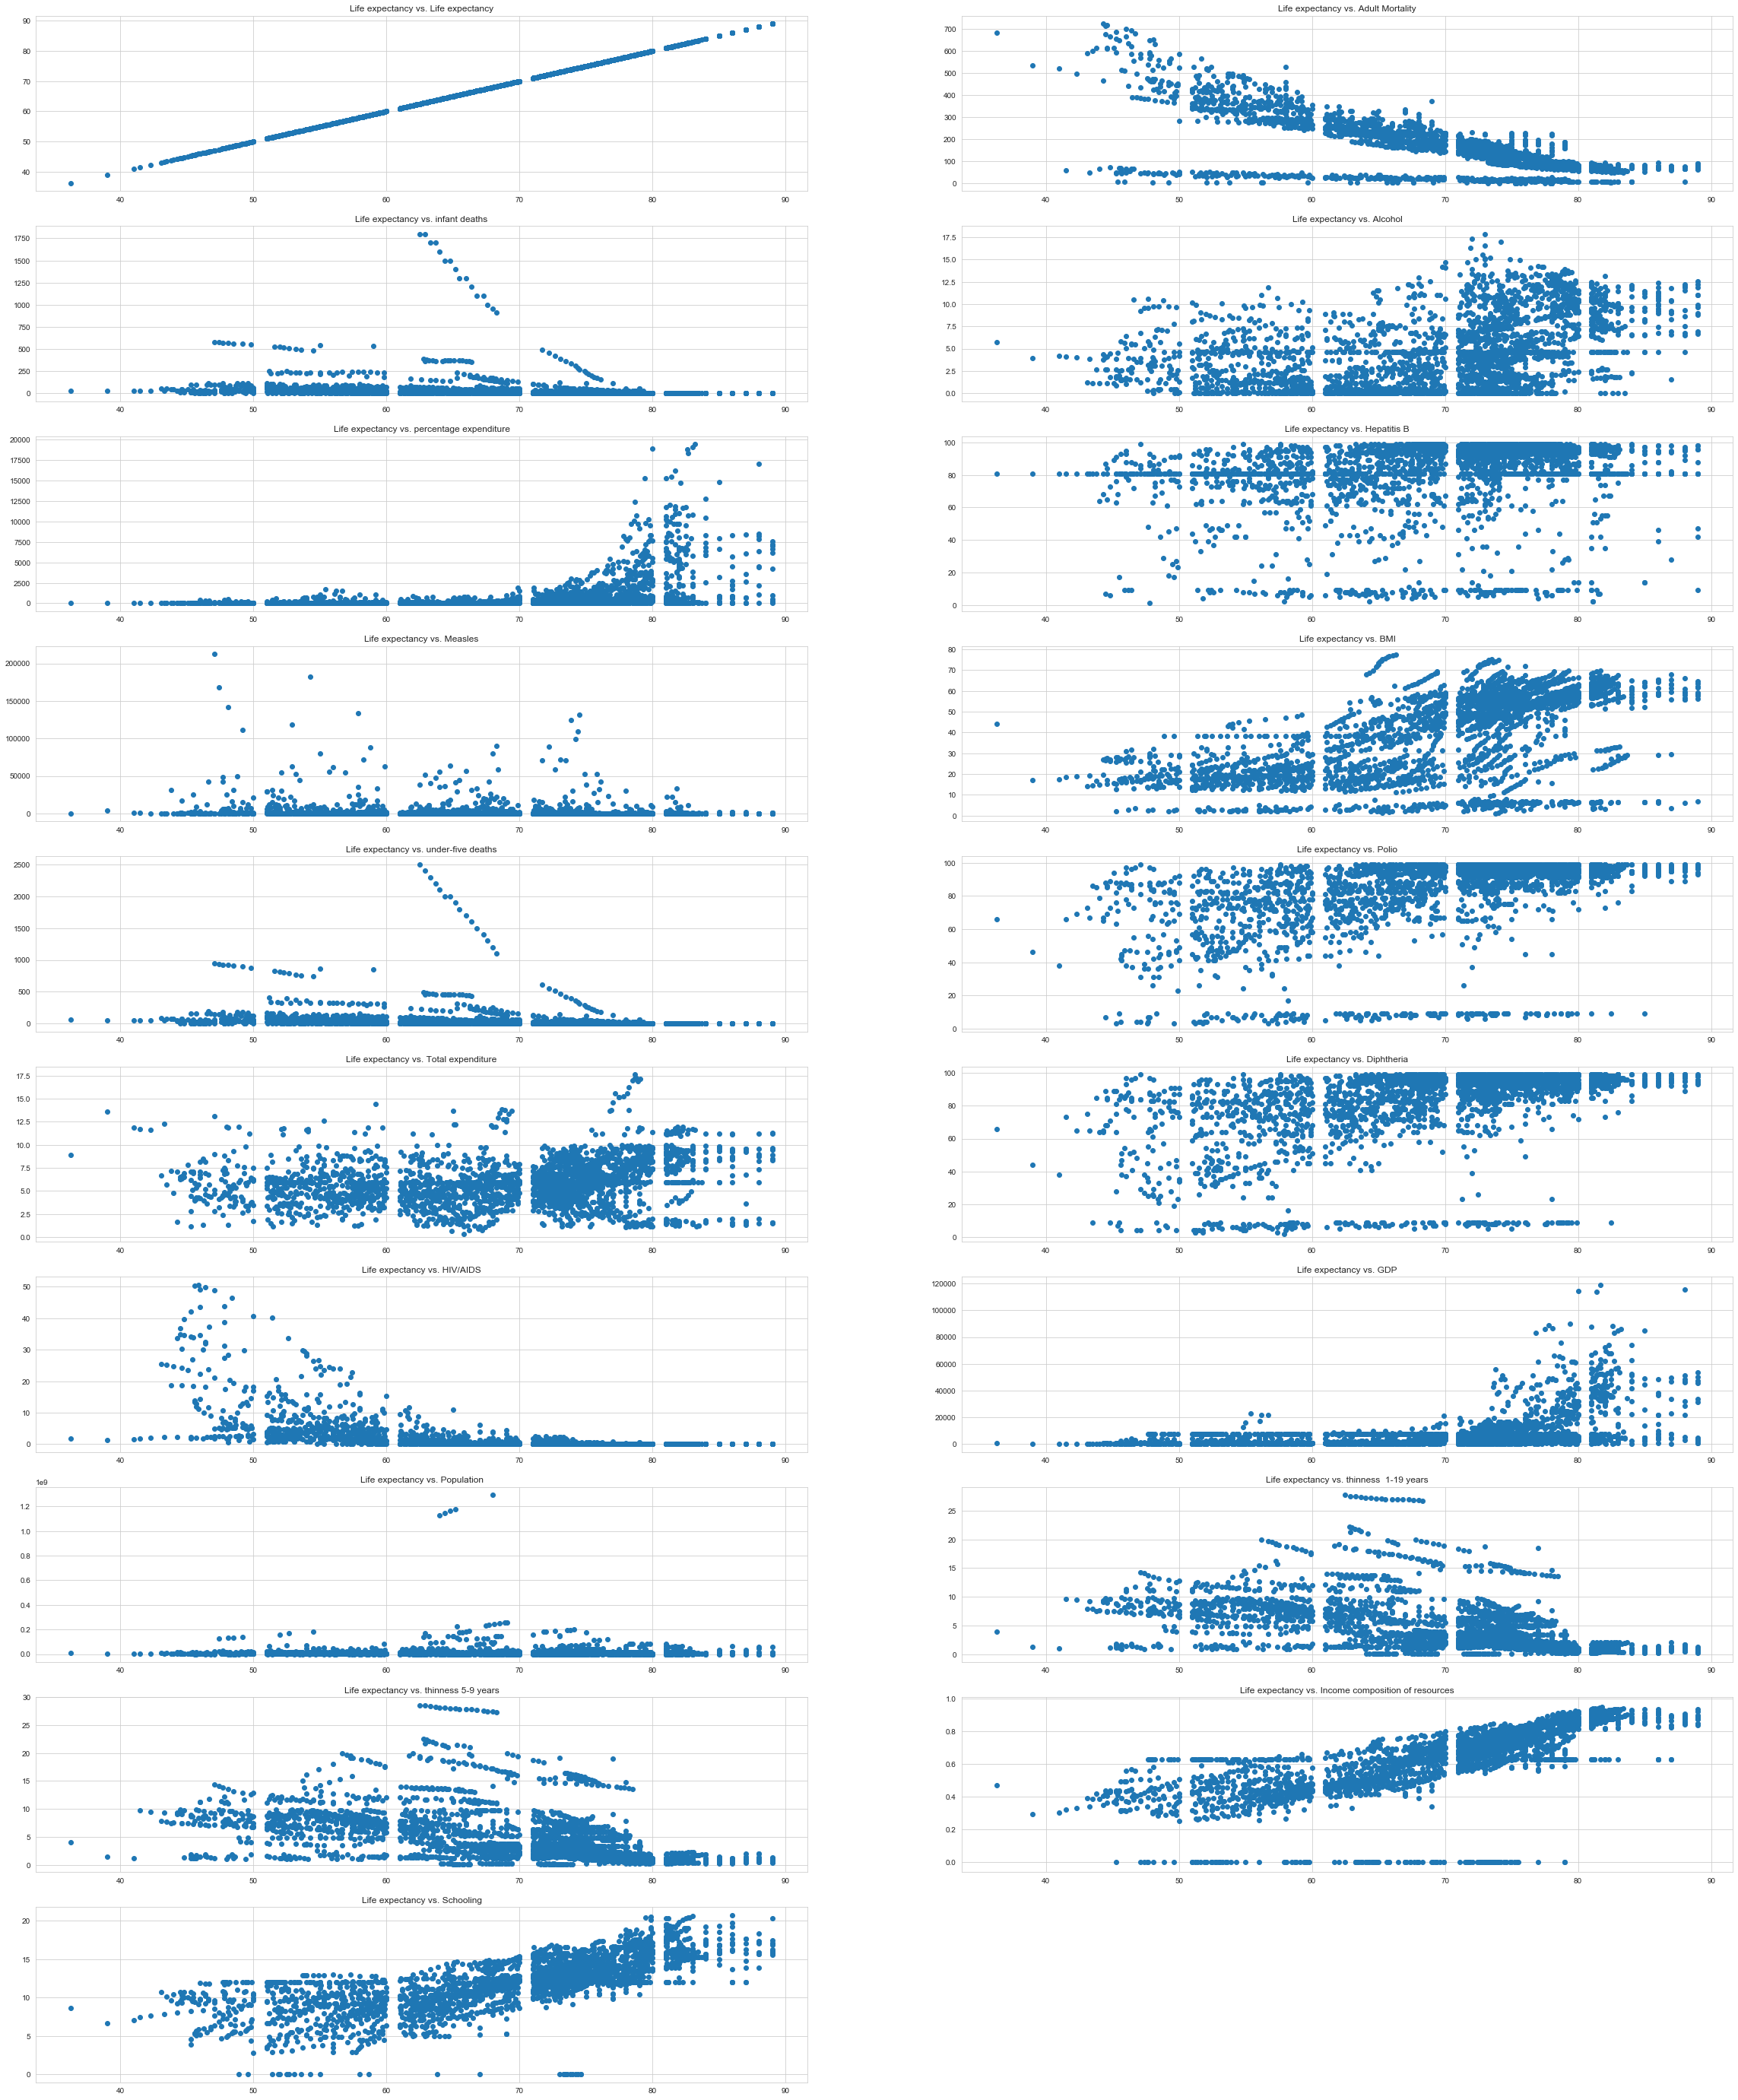

In [76]:
plt.figure(figsize=(40,50))

plt.subplot(10,2,1)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Life expectancy"])
plt.title("Life expectancy vs. Life expectancy")

plt.subplot(10,2,2)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Adult Mortality"])
plt.title("Life expectancy vs. Adult Mortality")

plt.subplot(10,2,3)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["infant deaths"])
plt.title("Life expectancy vs. infant deaths")

plt.subplot(10,2,4)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Alcohol"])
plt.title("Life expectancy vs. Alcohol")

plt.subplot(10,2,5)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["percentage expenditure"])
plt.title("Life expectancy vs. percentage expenditure")

plt.subplot(10,2,6)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Hepatitis B"])
plt.title("Life expectancy vs. Hepatitis B")

plt.subplot(10,2,7)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Measles"])
plt.title("Life expectancy vs. Measles")

plt.subplot(10,2,8)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["BMI"])
plt.title("Life expectancy vs. BMI")

plt.subplot(10,2,9)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["under-five deaths"])
plt.title("Life expectancy vs. under-five deaths")

plt.subplot(10,2,10)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Polio"])
plt.title("Life expectancy vs. Polio")

plt.subplot(10,2,11)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Total expenditure"])
plt.title("Life expectancy vs. Total expenditure")

plt.subplot(10,2,12)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Diphtheria"])
plt.title("Life expectancy vs. Diphtheria")

plt.subplot(10,2,13)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["HIV/AIDS"])
plt.title("Life expectancy vs. HIV/AIDS")

plt.subplot(10,2,14)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["GDP"])
plt.title("Life expectancy vs. GDP")

plt.subplot(10,2,15)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Population"])
plt.title("Life expectancy vs. Population")

plt.subplot(10,2,16)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["thinness  1-19 years"])
plt.title("Life expectancy vs. thinness  1-19 years")

plt.subplot(10,2,17)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["thinness 5-9 years"])
plt.title("Life expectancy vs. thinness 5-9 years")

plt.subplot(10,2,18)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Income composition of resources"])
plt.title("Life expectancy vs. Income composition of resources")

plt.subplot(10,2,19)
plt.scatter(life_expectancy_cg["Life expectancy"], life_expectancy_cg["Schooling"])
plt.title("Life expectancy vs. Schooling")


plt.show()


As we can see from scatterplot, 

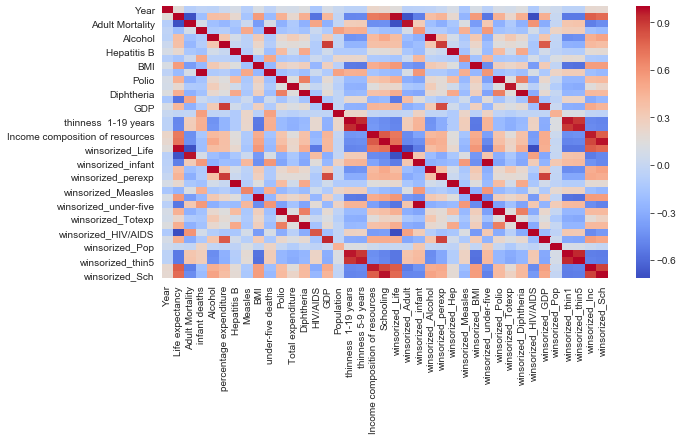

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(life_expectancy_cg.corr(),cmap='coolwarm')

Dark red to dark blue, correlation from high to low.

Transforming the existing variables:

In [85]:
# one-hot encoding the Grade variable: 
pd.get_dummies(life_expectancy_cg['Status'])

Developed  Developing
Country                                
Afghanistan 0             0           1
            1             0           1
            2             0           1
            3             0           1
            4             0           1
            5             0           1
            6             0           1
            7             0           1
            8             0           1
            9             0           1
            10            0           1
            11            0           1
            12            0           1
            13            0           1
            14            0           1
            15            0           1
Albania     16            0           1
            17            0           1
            18            0           1
            19            0           1
            20            0           1
            21            0           1
            22            0           1
            23            0           1
            24            0           1
            25            0           1
            26            0           1
            27            0           1
            28            0           1
            29            0           1
...                     ...         ...
Zambia      2908          0           1
            2909          0           1
            2910          0           1
            2911          0           1
            2912          0           1
            2913          0           1
            2914          0           1
            2915          0           1
            2916          0           1
            2917          0           1
            2918          0           1
            2919          0           1
            2920          0           1
            2921          0           1
Zimbabwe    2922          0           1
            2923          0           1
            2924          0           1
            2925          0           1
            2926          0           1
            2927          0           1
            2928          0           1
            2929          0           1
            2930          0           1
            2931          0           1
            2932          0           1
            2933          0           1
            2934          0           1
            2935          0           1
            2936          0           1
            2937          0           1

[2928 rows x 2 columns]

In [87]:
# append dummies to YouTube dataframe
life_expectancy_cg = pd.concat([life_expectancy_cg, pd.get_dummies(life_expectancy_cg['Status'])], axis=1)
life_expectancy_cg.head()

Country  Year      Status  Life expectancy  \
Country                                                         
Afghanistan 0  Afghanistan  2015  Developing             65.0   
            1  Afghanistan  2014  Developing             59.9   
            2  Afghanistan  2013  Developing             59.9   
            3  Afghanistan  2012  Developing             59.5   
            4  Afghanistan  2011  Developing             59.2   

               Adult Mortality  infant deaths  Alcohol  \
Country                                                  
Afghanistan 0            263.0             62     0.01   
            1            271.0             64     0.01   
            2            268.0             66     0.01   
            3            272.0             69     0.01   
            4            275.0             71     0.01   

               percentage expenditure  Hepatitis B  Measles  ...  \
Country                                                      ...   
Afghanistan 0               71.279624         65.0     1154  ...   
            1               73.523582         62.0      492  ...   
            2               73.219243         64.0      430  ...   
            3               78.184215         67.0     2787  ...   
            4                7.097109         68.0     3013  ...   

               winsorized_GDP  winsorized_Pop  winsorized_thin1  \
Country                                                           
Afghanistan 0      584.259210      33736494.0              13.8   
            1      612.696514        327582.0              13.8   
            2      631.744976      31731688.0              13.8   
            3      669.959000       3696958.0              13.8   
            4       81.683884       2978599.0              13.8   

               winsorized_thin5  winsorized_Inc  winsorized_Sch  Developed  \
Country                                                                      
Afghanistan 0              13.8           0.479            10.1          0   
            1              13.8           0.476            10.0          0   
            2              13.8           0.470             9.9          0   
            3              13.8           0.463             9.8          0   
            4              13.8           0.454             9.5          0   

               Developing  Developed  Developing  
Country                                           
Afghanistan 0           1          0           1  
            1           1          0           1  
            2           1          0           1  
            3           1          0           1  
            4           1          0           1  

[5 rows x 45 columns]

### Feature engineering:

Box-Cox, log, and square root transformations only work when all datapoints are positive.

Normality Check using jarque-bera:

 Box-Cox transformation, another common way to make variables normally distributed.

from scipy.stats import boxcox

Life_expectancy_boxcox,_ = boxcox(life_expectancy_cg["Life expectancy"])
Adult_Mortality_boxcox,_ = boxcox(life_expectancy_cg["Adult Mortality"])
infant_deaths_boxcox,_ = boxcox(life_expectancy_cg["infant deaths"])
Alcohol_boxcox,_ = boxcox(life_expectancy_cg["Alcohol"])
percentage_expenditure_boxcox,_ = boxcox(life_expectancy_cg["percentage expenditure"])
Hepatitis_B_boxcox,_ = boxcox(life_expectancy_cg["Hepatitis B"])
Measles_boxcox,_ = boxcox(life_expectancy_cg["Measles"])
BMI_boxcox,_ = boxcox(life_expectancy_cg["BMI"])
under_five_deaths_boxcox,_ = boxcox(life_expectancy_cg["under-five deaths"])
Polio_boxcox,_ = boxcox(life_expectancy_cg["Polio"])
Total_expenditure_boxcox,_ = boxcox(life_expectancy_cg["Total expenditure"])
Diphtheria_boxcox,_ = boxcox(life_expectancy_cg["Diphtheria"])
HIV_AIDS_boxcox,_ = boxcox(life_expectancy_cg["HIV/AIDS"])
GDP_boxcox,_ = boxcox(life_expectancy_cg["GDP"])
Population_boxcox,_ = boxcox(life_expectancy_cg["Population"])
thinness_1_19_years_boxcox,_ = boxcox(life_expectancy_cg["thinness  1-19 years"])
thinness_5_9_years_boxcox,_ = boxcox(life_expectancy_cg["thinness 5-9 years"])
Income_composition_of_resources_boxcox,_ = boxcox(life_expectancy_cg["Income composition of resources"])
Schooling_boxcox,_ = boxcox(life_expectancy_cg["Schooling"])



# histograms of the box-cox transformed data
plt.figure(figsize=(30,40))

plt.subplot(10,2,1)
plt.hist(Life_expectancy_boxcox)
plt.title("Histogram of Life expectancy")

plt.subplot(10,2,2)
plt.hist(Adult_Mortality_boxcox)
plt.title("Histogram of Adult Mortality")

plt.subplot(10,2,3)
plt.hist(infant_deaths_boxcox)
plt.title("Histogram of infant deaths")

plt.subplot(10,2,4)
plt.hist(Alcohol_boxcox)
plt.title("Histogram of Alcohol")

plt.subplot(10,2,5)
plt.hist(percentage_expenditure_boxcox)
plt.title("Histogram of percentage expenditure")

plt.subplot(10,2,6)
plt.hist(Hepatitis_B_boxcox)
plt.title("Histogram of Hepatitis B")

plt.subplot(10,2,7)
plt.hist(Measles_boxcox)
plt.title("Histogram of Measles")

plt.subplot(10,2,8)
plt.hist(BMI_boxcox)
plt.title("Histogram of BMI")

plt.subplot(10,2,9)
plt.hist(under_five_deaths_boxcox)
plt.title("Histogram of under-five deaths")

plt.subplot(10,2,10)
plt.hist(Polio_boxcox)
plt.title("Histogram of Polio")

plt.subplot(10,2,11)
plt.hist(Total_expenditure_boxcox)
plt.title("Histogram of Total expenditure")

plt.subplot(10,2,12)
plt.hist(Diphtheria_boxcox)
plt.title("Histogram of Diphtheria")

plt.subplot(10,2,13)
plt.hist(HIV_AIDS_boxcox)
plt.title("Histogram of HIV/AIDS")

plt.subplot(10,2,14)
plt.hist(GDP_boxcox)
plt.title("Histogram of GDP")

plt.subplot(10,2,15)
plt.hist(Population_boxcox)
plt.title("Histogram of Population")

plt.subplot(10,2,16)
plt.hist(thinness_1_19_years_boxcox)
plt.title("Histogram of thinness  1-19 years")

plt.subplot(10,2,17)
plt.hist(thinness_5_9_years_boxcox)
plt.title("Histogram of thinness 5-9 years")

plt.subplot(10,2,18)
plt.hist(Income_composition_of_resources_boxcox)
plt.title("Histogram of Income composition of resources")

plt.subplot(10,2,19)
plt.hist(Schooling_boxcox)
plt.title("Histogram of Schooling")


plt.show()


### Normalization and standardization:

Normalization of a variable into the [0,1] range (including 0 and 1).
Standardization of a variable so its mean becomes 0 and its standard deviation becomes 1.

### Normalization:

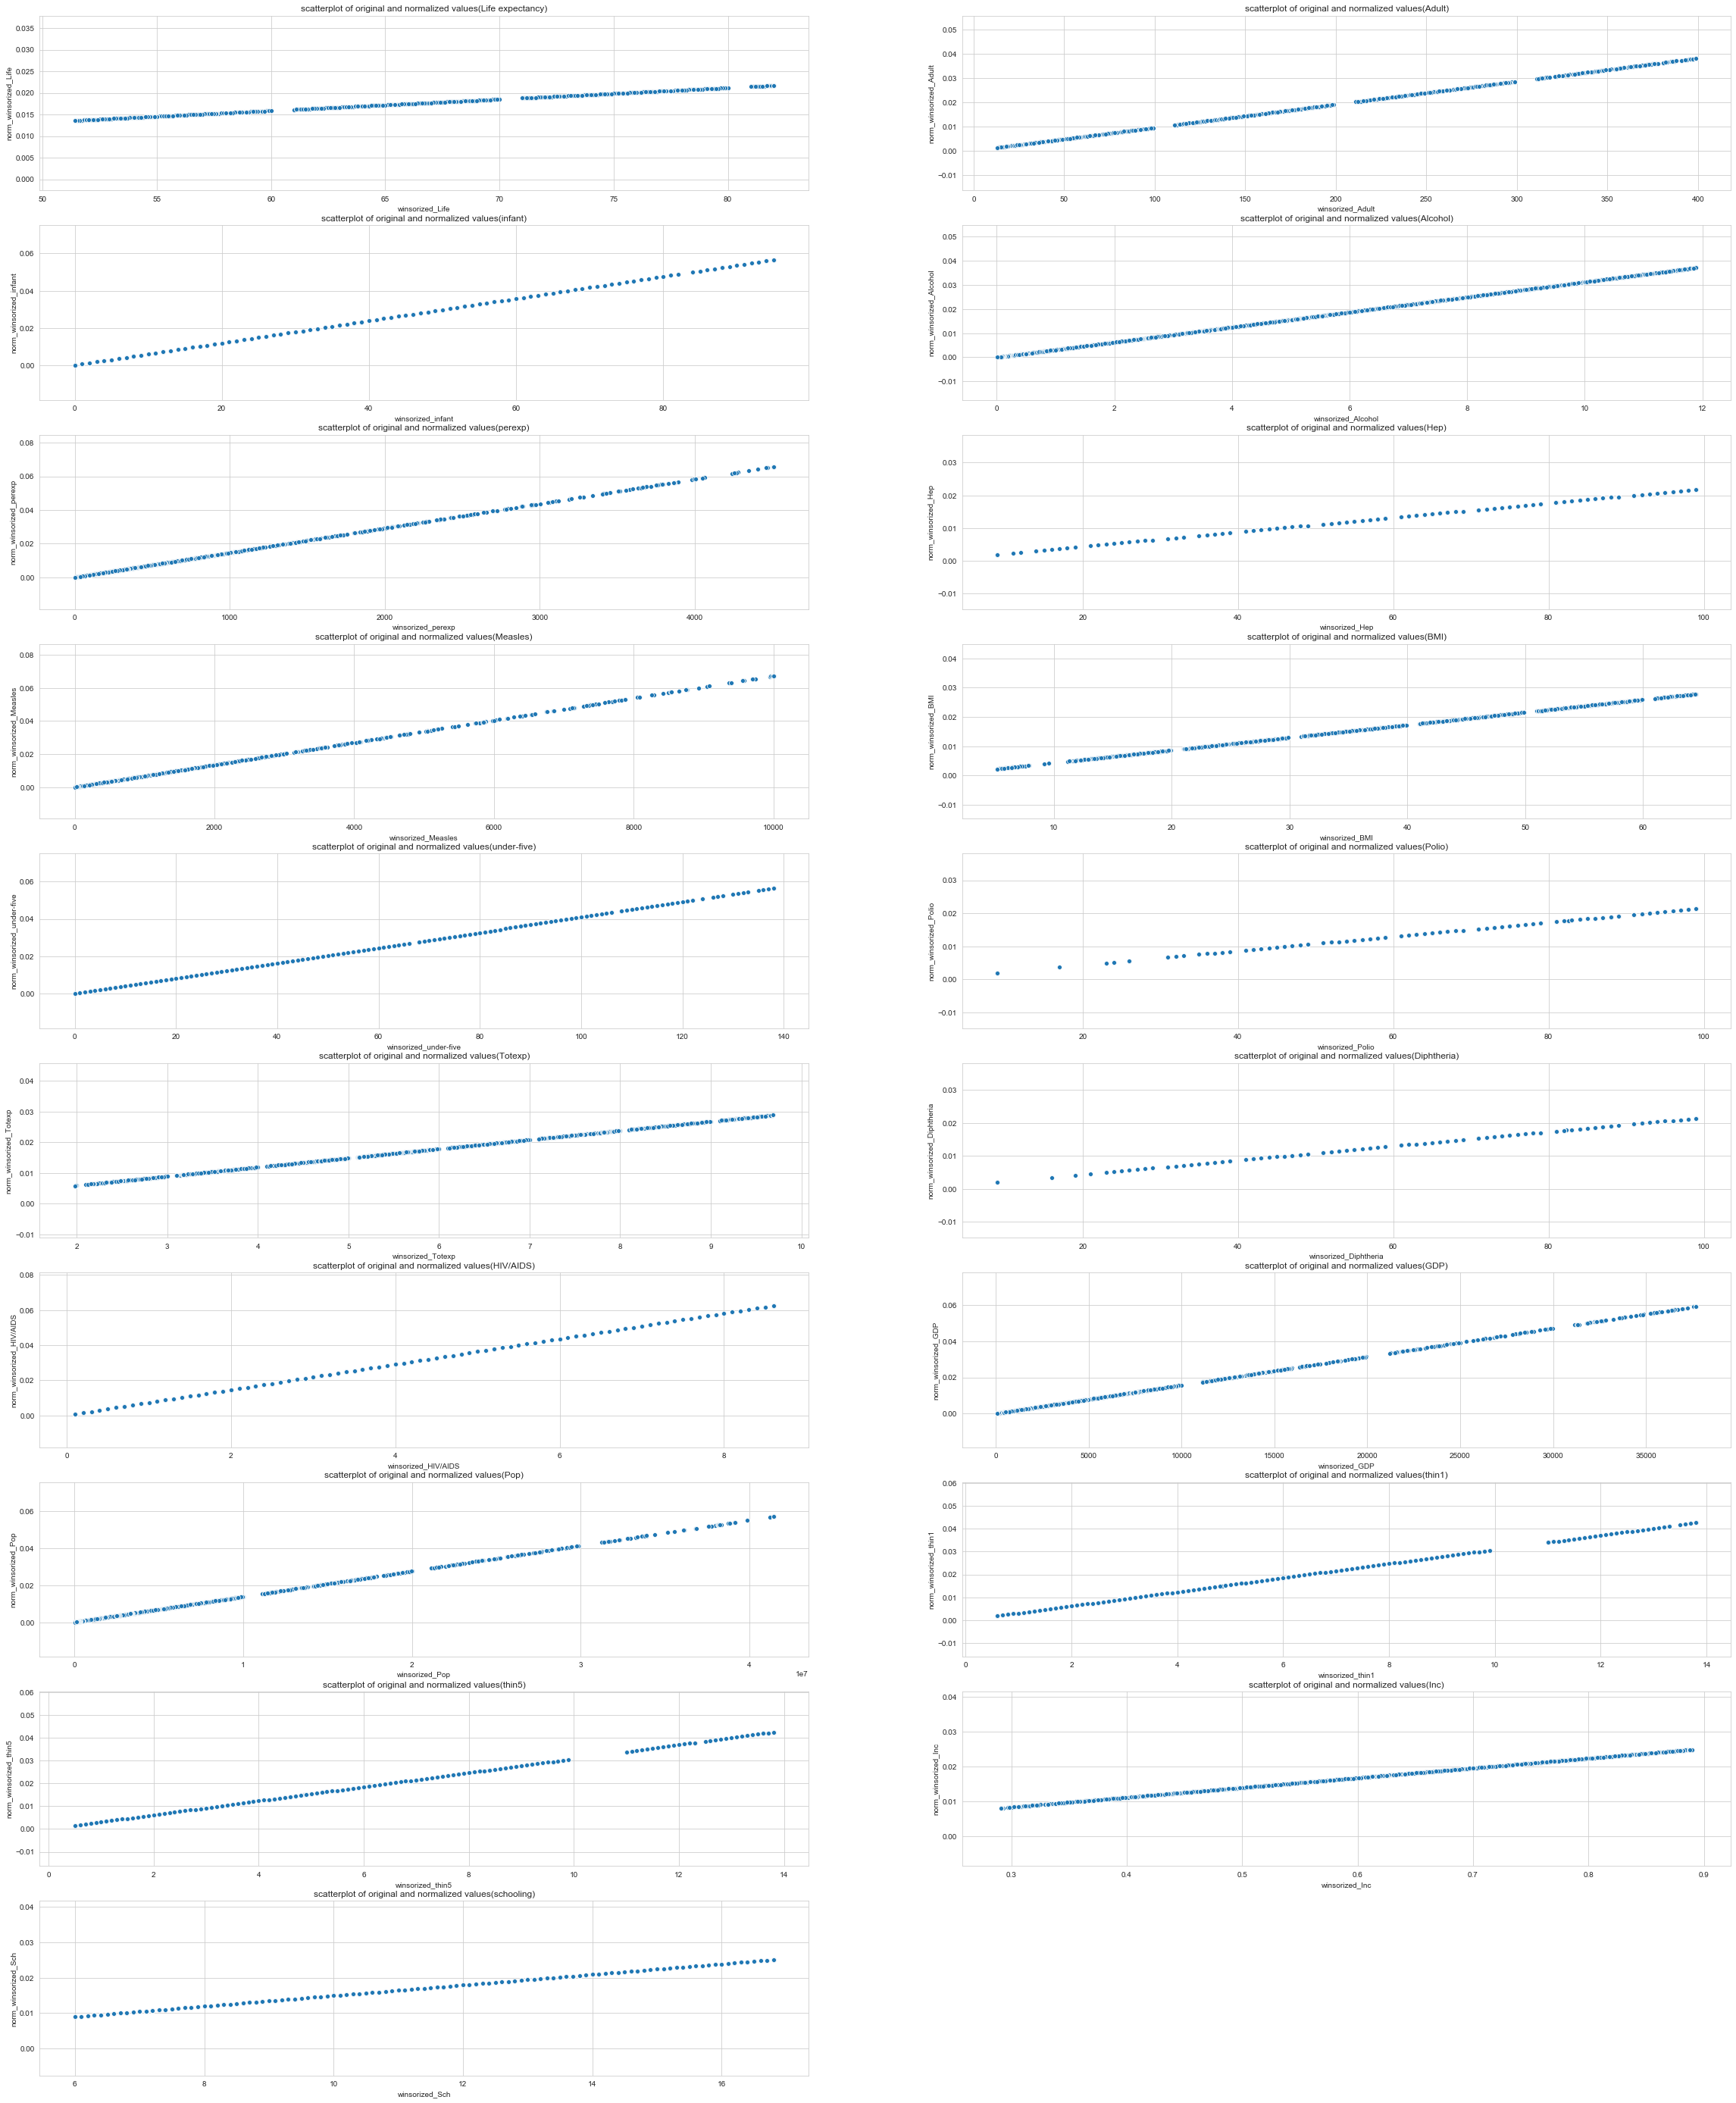

In [98]:
from sklearn.preprocessing import normalize

# normalize the winsorized variables(rescaling)

life_expectancy_cg["norm_winsorized_Life"] = normalize(np.array(life_expectancy_cg["winsorized_Life"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Adult"] = normalize(np.array(life_expectancy_cg["winsorized_Adult"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_infant"] =  normalize(np.array(life_expectancy_cg["winsorized_infant"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Alcohol"] = normalize(np.array(life_expectancy_cg["winsorized_Alcohol"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_perexp"] = normalize(np.array(life_expectancy_cg["winsorized_perexp"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Hep"] = normalize(np.array(life_expectancy_cg["winsorized_Hep"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Measles"] = normalize(np.array(life_expectancy_cg["winsorized_Measles"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_BMI"]= normalize(np.array(life_expectancy_cg["winsorized_BMI"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_under-five"]= normalize(np.array(life_expectancy_cg["winsorized_under-five"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Polio"]= normalize(np.array(life_expectancy_cg["winsorized_Polio"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Totexp"]= normalize(np.array(life_expectancy_cg["winsorized_Totexp"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Diphtheria"]= normalize(np.array(life_expectancy_cg["winsorized_Diphtheria"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_HIV/AIDS"]= normalize(np.array(life_expectancy_cg["winsorized_HIV/AIDS"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_GDP"]= normalize(np.array(life_expectancy_cg["winsorized_GDP"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Pop"]= normalize(np.array(life_expectancy_cg["winsorized_Pop"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_thin1"]= normalize(np.array(life_expectancy_cg["winsorized_thin1"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_thin5"]= normalize(np.array(life_expectancy_cg["winsorized_thin5"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Inc"]= normalize(np.array(life_expectancy_cg["winsorized_Inc"]).reshape(1,-1)).reshape(-1,1)

life_expectancy_cg["norm_winsorized_Sch"]= normalize(np.array(life_expectancy_cg["winsorized_Sch"]).reshape(1,-1)).reshape(-1,1)



plt.figure(figsize=(40,50))

# draw the scatter plot using seaborn.
plt.subplot(10,2,1)
sns.scatterplot(life_expectancy_cg["winsorized_Life"], life_expectancy_cg["norm_winsorized_Life"])
plt.title("scatterplot of original and normalized values(Life expectancy)")

plt.subplot(10,2,2)
sns.scatterplot(life_expectancy_cg["winsorized_Adult"], life_expectancy_cg["norm_winsorized_Adult"])
plt.title("scatterplot of original and normalized values(Adult)")

plt.subplot(10,2,3)
sns.scatterplot(life_expectancy_cg["winsorized_infant"], life_expectancy_cg["norm_winsorized_infant"])
plt.title("scatterplot of original and normalized values(infant)")

plt.subplot(10,2,4)
sns.scatterplot(life_expectancy_cg["winsorized_Alcohol"], life_expectancy_cg["norm_winsorized_Alcohol"])
plt.title("scatterplot of original and normalized values(Alcohol)")

plt.subplot(10,2,5)
sns.scatterplot(life_expectancy_cg["winsorized_perexp"], life_expectancy_cg["norm_winsorized_perexp"])
plt.title("scatterplot of original and normalized values(perexp)")

plt.subplot(10,2,6)
sns.scatterplot(life_expectancy_cg["winsorized_Hep"], life_expectancy_cg["norm_winsorized_Hep"])
plt.title("scatterplot of original and normalized values(Hep)")

plt.subplot(10,2,7)
sns.scatterplot(life_expectancy_cg["winsorized_Measles"], life_expectancy_cg["norm_winsorized_Measles"])
plt.title("scatterplot of original and normalized values(Measles)")

plt.subplot(10,2,8)
sns.scatterplot(life_expectancy_cg["winsorized_BMI"], life_expectancy_cg["norm_winsorized_BMI"])
plt.title("scatterplot of original and normalized values(BMI)")


plt.subplot(10,2,9)
sns.scatterplot(life_expectancy_cg["winsorized_under-five"], life_expectancy_cg["norm_winsorized_under-five"])
plt.title("scatterplot of original and normalized values(under-five)")

plt.subplot(10,2,10)
sns.scatterplot(life_expectancy_cg["winsorized_Polio"], life_expectancy_cg["norm_winsorized_Polio"])
plt.title("scatterplot of original and normalized values(Polio)")


plt.subplot(10,2,11)
sns.scatterplot(life_expectancy_cg["winsorized_Totexp"], life_expectancy_cg["norm_winsorized_Totexp"])
plt.title("scatterplot of original and normalized values(Totexp)")


plt.subplot(10,2,12)
sns.scatterplot(life_expectancy_cg["winsorized_Diphtheria"], life_expectancy_cg["norm_winsorized_Diphtheria"])
plt.title("scatterplot of original and normalized values(Diphtheria)")

plt.subplot(10,2,13)
sns.scatterplot(life_expectancy_cg["winsorized_HIV/AIDS"], life_expectancy_cg["norm_winsorized_HIV/AIDS"])
plt.title("scatterplot of original and normalized values(HIV/AIDS)")

plt.subplot(10,2,14)
sns.scatterplot(life_expectancy_cg["winsorized_GDP"], life_expectancy_cg["norm_winsorized_GDP"])
plt.title("scatterplot of original and normalized values(GDP)")


plt.subplot(10,2,15)
sns.scatterplot(life_expectancy_cg["winsorized_Pop"], life_expectancy_cg["norm_winsorized_Pop"])
plt.title("scatterplot of original and normalized values(Pop)")


plt.subplot(10,2,16)
sns.scatterplot(life_expectancy_cg["winsorized_thin1"], life_expectancy_cg["norm_winsorized_thin1"])
plt.title("scatterplot of original and normalized values(thin1)")


plt.subplot(10,2,17)
sns.scatterplot(life_expectancy_cg["winsorized_thin5"], life_expectancy_cg["norm_winsorized_thin5"])
plt.title("scatterplot of original and normalized values(thin5)")


plt.subplot(10,2,18)
sns.scatterplot(life_expectancy_cg["winsorized_Inc"], life_expectancy_cg["norm_winsorized_Inc"])
plt.title("scatterplot of original and normalized values(Inc)")

plt.subplot(10,2,19)
sns.scatterplot(life_expectancy_cg["winsorized_Sch"], life_expectancy_cg["norm_winsorized_Sch"])
plt.title("scatterplot of original and normalized values(schooling)")




plt.show()

### Standardization:

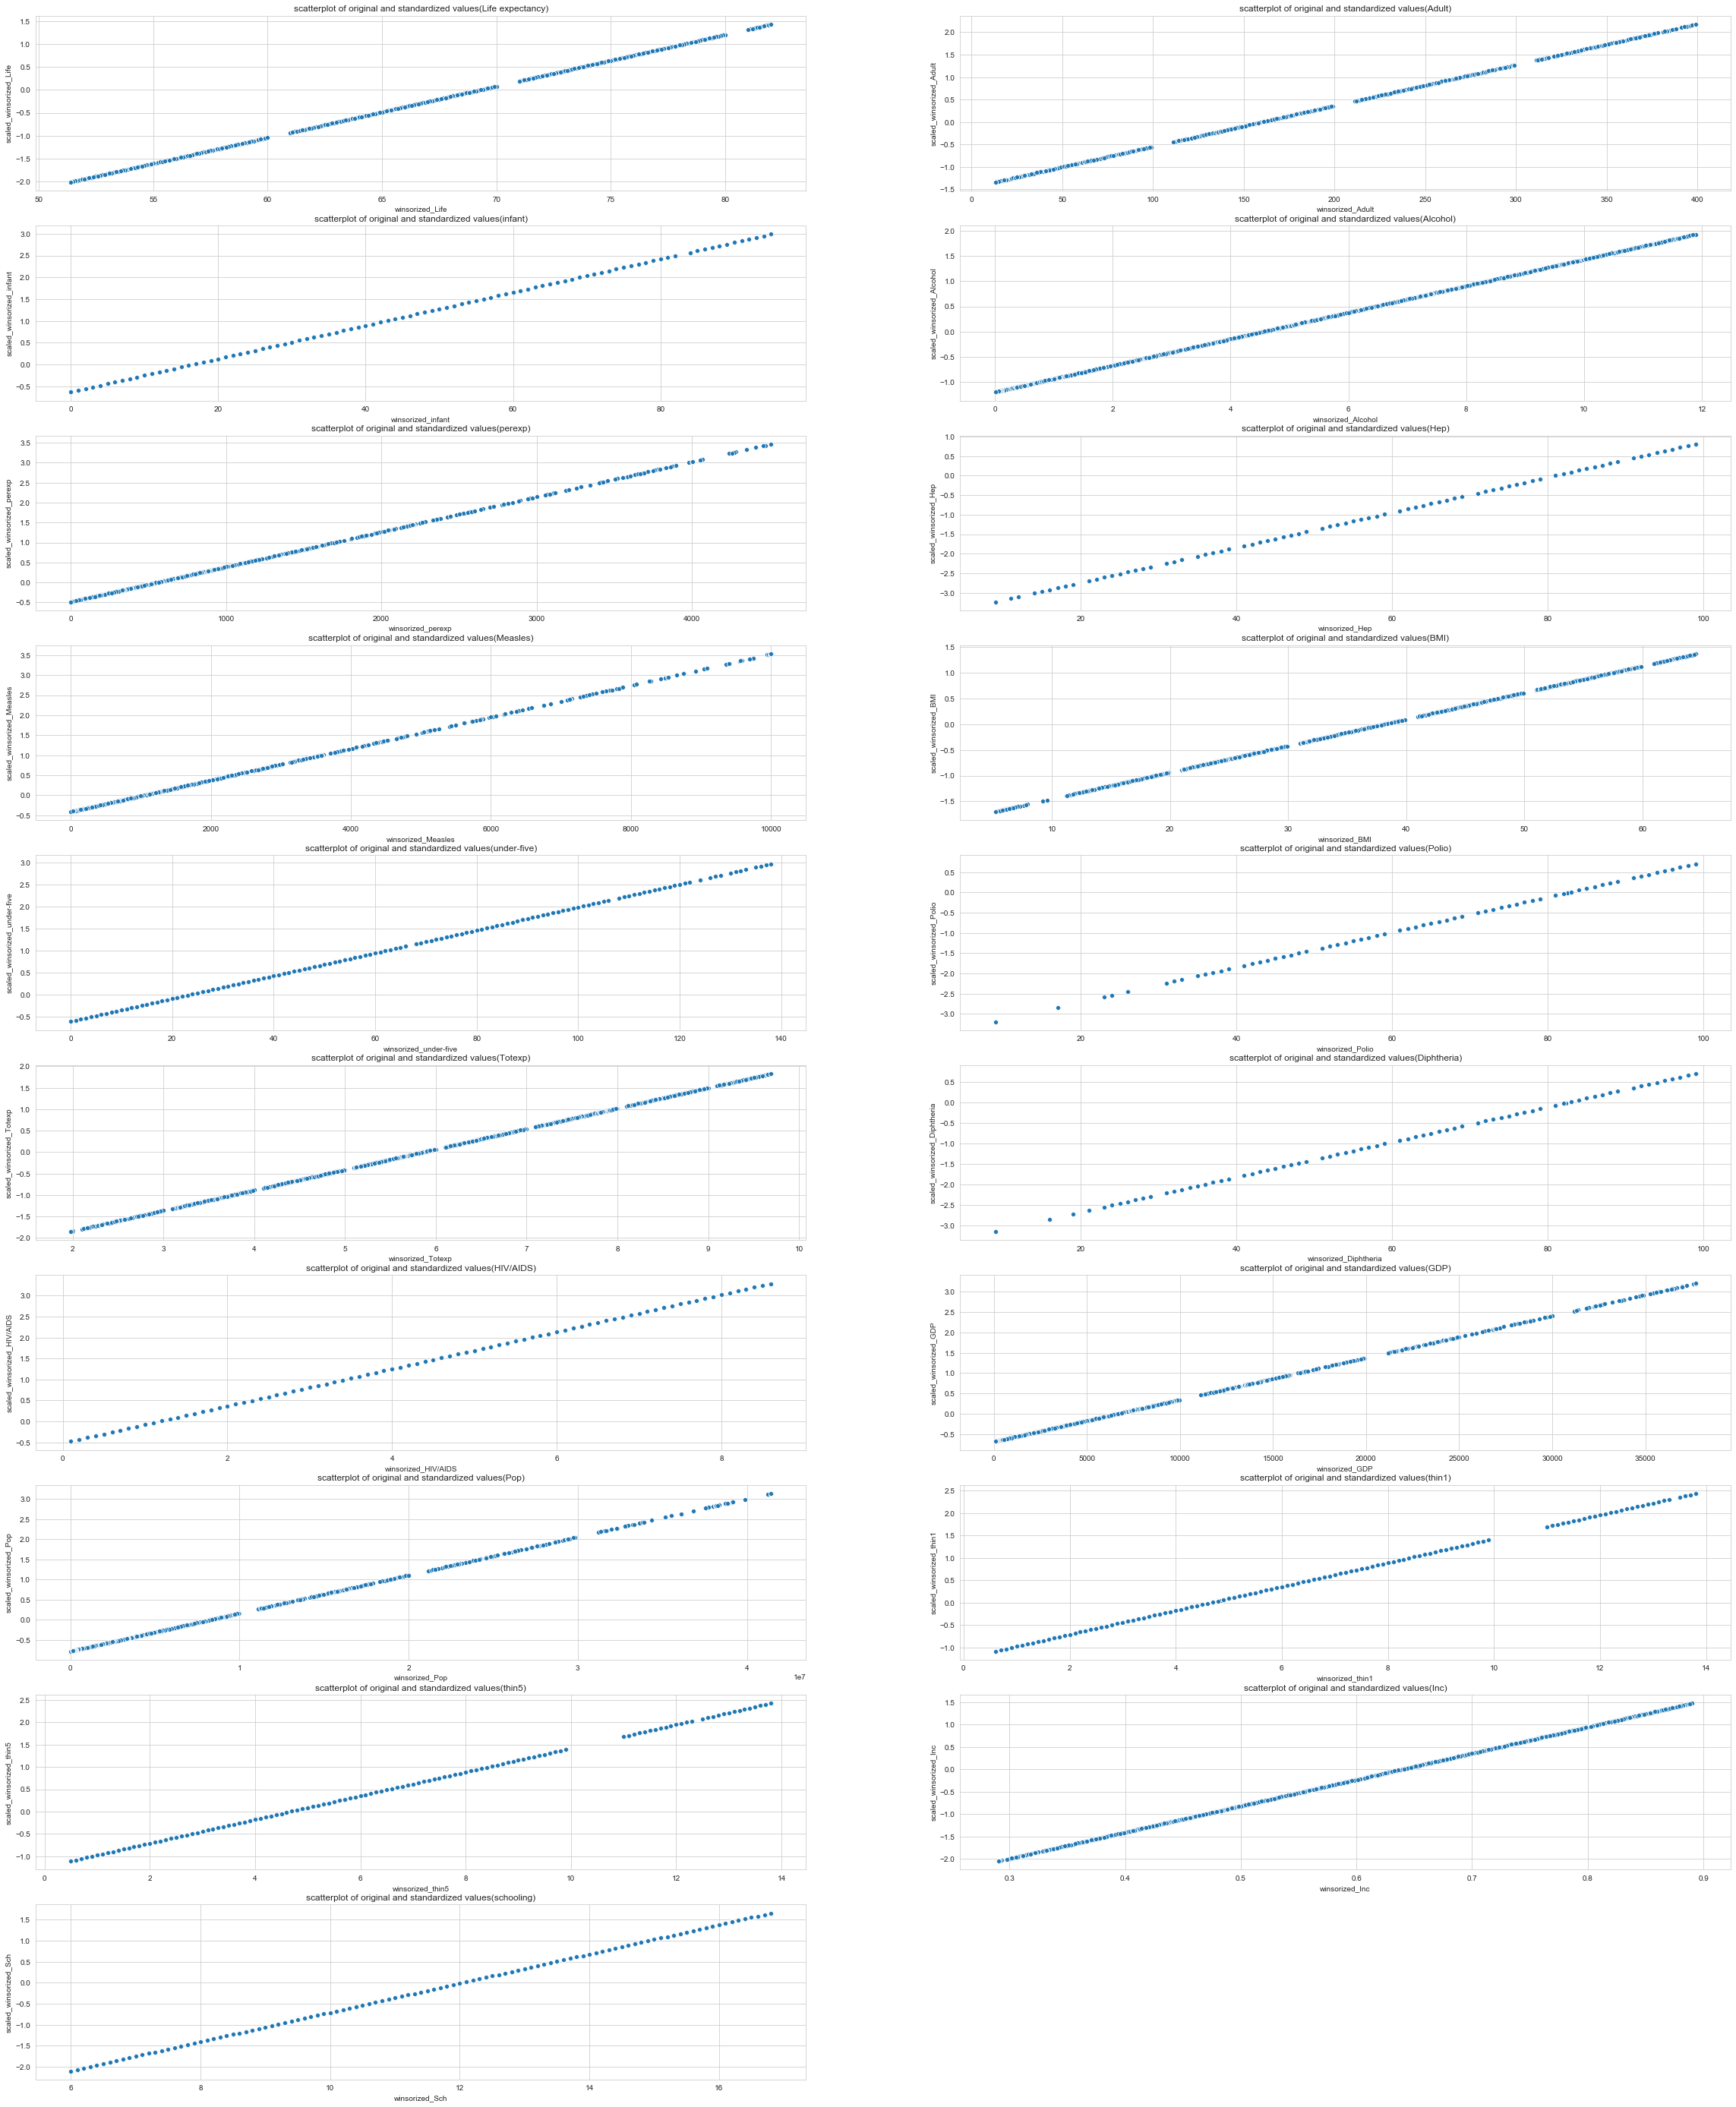

In [97]:
from sklearn.preprocessing import scale

# Standardizing the winsorized variables(rescaling)

life_expectancy_cg["scaled_winsorized_Life"] = scale(life_expectancy_cg["winsorized_Life"])
life_expectancy_cg["scaled_winsorized_Adult"] = scale(life_expectancy_cg["winsorized_Adult"])

life_expectancy_cg["scaled_winsorized_infant"] =  scale(life_expectancy_cg["winsorized_infant"])

life_expectancy_cg["scaled_winsorized_Alcohol"] = scale(life_expectancy_cg["winsorized_Alcohol"])

life_expectancy_cg["scaled_winsorized_perexp"] = scale(life_expectancy_cg["winsorized_perexp"])

life_expectancy_cg["scaled_winsorized_Hep"] = scale(life_expectancy_cg["winsorized_Hep"])

life_expectancy_cg["scaled_winsorized_Measles"] = scale(life_expectancy_cg["winsorized_Measles"])

life_expectancy_cg["scaled_winsorized_BMI"]= scale(life_expectancy_cg["winsorized_BMI"])

life_expectancy_cg["scaled_winsorized_under-five"]= scale(life_expectancy_cg["winsorized_under-five"])

life_expectancy_cg["scaled_winsorized_Polio"]= scale(life_expectancy_cg["winsorized_Polio"])

life_expectancy_cg["scaled_winsorized_Totexp"]= scale(life_expectancy_cg["winsorized_Totexp"])

life_expectancy_cg["scaled_winsorized_Diphtheria"]= scale(life_expectancy_cg["winsorized_Diphtheria"])

life_expectancy_cg["scaled_winsorized_HIV/AIDS"]= scale(life_expectancy_cg["winsorized_HIV/AIDS"])

life_expectancy_cg["scaled_winsorized_GDP"]= scale(life_expectancy_cg["winsorized_GDP"])

life_expectancy_cg["scaled_winsorized_Pop"]= scale(life_expectancy_cg["winsorized_Pop"])

life_expectancy_cg["scaled_winsorized_thin1"]= scale(life_expectancy_cg["winsorized_thin1"])

life_expectancy_cg["scaled_winsorized_thin5"]= scale(life_expectancy_cg["winsorized_thin5"])

life_expectancy_cg["scaled_winsorized_Inc"]= scale(life_expectancy_cg["winsorized_Inc"])

life_expectancy_cg["scaled_winsorized_Sch"]= scale(life_expectancy_cg["winsorized_Sch"])



plt.figure(figsize=(40,50))

# draw the scatter plot using seaborn.
plt.subplot(10,2,1)
sns.scatterplot(life_expectancy_cg["winsorized_Life"], life_expectancy_cg["scaled_winsorized_Life"])
plt.title("scatterplot of original and standardized values(Life expectancy)")

plt.subplot(10,2,2)
sns.scatterplot(life_expectancy_cg["winsorized_Adult"], life_expectancy_cg["scaled_winsorized_Adult"])
plt.title("scatterplot of original and standardized values(Adult)")

plt.subplot(10,2,3)
sns.scatterplot(life_expectancy_cg["winsorized_infant"], life_expectancy_cg["scaled_winsorized_infant"])
plt.title("scatterplot of original and standardized values(infant)")

plt.subplot(10,2,4)
sns.scatterplot(life_expectancy_cg["winsorized_Alcohol"], life_expectancy_cg["scaled_winsorized_Alcohol"])
plt.title("scatterplot of original and standardized values(Alcohol)")

plt.subplot(10,2,5)
sns.scatterplot(life_expectancy_cg["winsorized_perexp"], life_expectancy_cg["scaled_winsorized_perexp"])
plt.title("scatterplot of original and standardized values(perexp)")

plt.subplot(10,2,6)
sns.scatterplot(life_expectancy_cg["winsorized_Hep"], life_expectancy_cg["scaled_winsorized_Hep"])
plt.title("scatterplot of original and standardized values(Hep)")

plt.subplot(10,2,7)
sns.scatterplot(life_expectancy_cg["winsorized_Measles"], life_expectancy_cg["scaled_winsorized_Measles"])
plt.title("scatterplot of original and standardized values(Measles)")

plt.subplot(10,2,8)
sns.scatterplot(life_expectancy_cg["winsorized_BMI"], life_expectancy_cg["scaled_winsorized_BMI"])
plt.title("scatterplot of original and standardized values(BMI)")


plt.subplot(10,2,9)
sns.scatterplot(life_expectancy_cg["winsorized_under-five"], life_expectancy_cg["scaled_winsorized_under-five"])
plt.title("scatterplot of original and standardized values(under-five)")

plt.subplot(10,2,10)
sns.scatterplot(life_expectancy_cg["winsorized_Polio"], life_expectancy_cg["scaled_winsorized_Polio"])
plt.title("scatterplot of original and standardized values(Polio)")


plt.subplot(10,2,11)
sns.scatterplot(life_expectancy_cg["winsorized_Totexp"], life_expectancy_cg["scaled_winsorized_Totexp"])
plt.title("scatterplot of original and standardized values(Totexp)")


plt.subplot(10,2,12)
sns.scatterplot(life_expectancy_cg["winsorized_Diphtheria"], life_expectancy_cg["scaled_winsorized_Diphtheria"])
plt.title("scatterplot of original and standardized values(Diphtheria)")

plt.subplot(10,2,13)
sns.scatterplot(life_expectancy_cg["winsorized_HIV/AIDS"], life_expectancy_cg["scaled_winsorized_HIV/AIDS"])
plt.title("scatterplot of original and standardized values(HIV/AIDS)")

plt.subplot(10,2,14)
sns.scatterplot(life_expectancy_cg["winsorized_GDP"], life_expectancy_cg["scaled_winsorized_GDP"])
plt.title("scatterplot of original and standardized values(GDP)")


plt.subplot(10,2,15)
sns.scatterplot(life_expectancy_cg["winsorized_Pop"], life_expectancy_cg["scaled_winsorized_Pop"])
plt.title("scatterplot of original and standardized values(Pop)")


plt.subplot(10,2,16)
sns.scatterplot(life_expectancy_cg["winsorized_thin1"], life_expectancy_cg["scaled_winsorized_thin1"])
plt.title("scatterplot of original and standardized values(thin1)")


plt.subplot(10,2,17)
sns.scatterplot(life_expectancy_cg["winsorized_thin5"], life_expectancy_cg["scaled_winsorized_thin5"])
plt.title("scatterplot of original and standardized values(thin5)")


plt.subplot(10,2,18)
sns.scatterplot(life_expectancy_cg["winsorized_Inc"], life_expectancy_cg["scaled_winsorized_Inc"])
plt.title("scatterplot of original and standardized values(Inc)")

plt.subplot(10,2,19)
sns.scatterplot(life_expectancy_cg["winsorized_Sch"], life_expectancy_cg["scaled_winsorized_Sch"])
plt.title("scatterplot of original and standardized values(schooling)")


plt.show()


### Dimensionality reduction: PCA